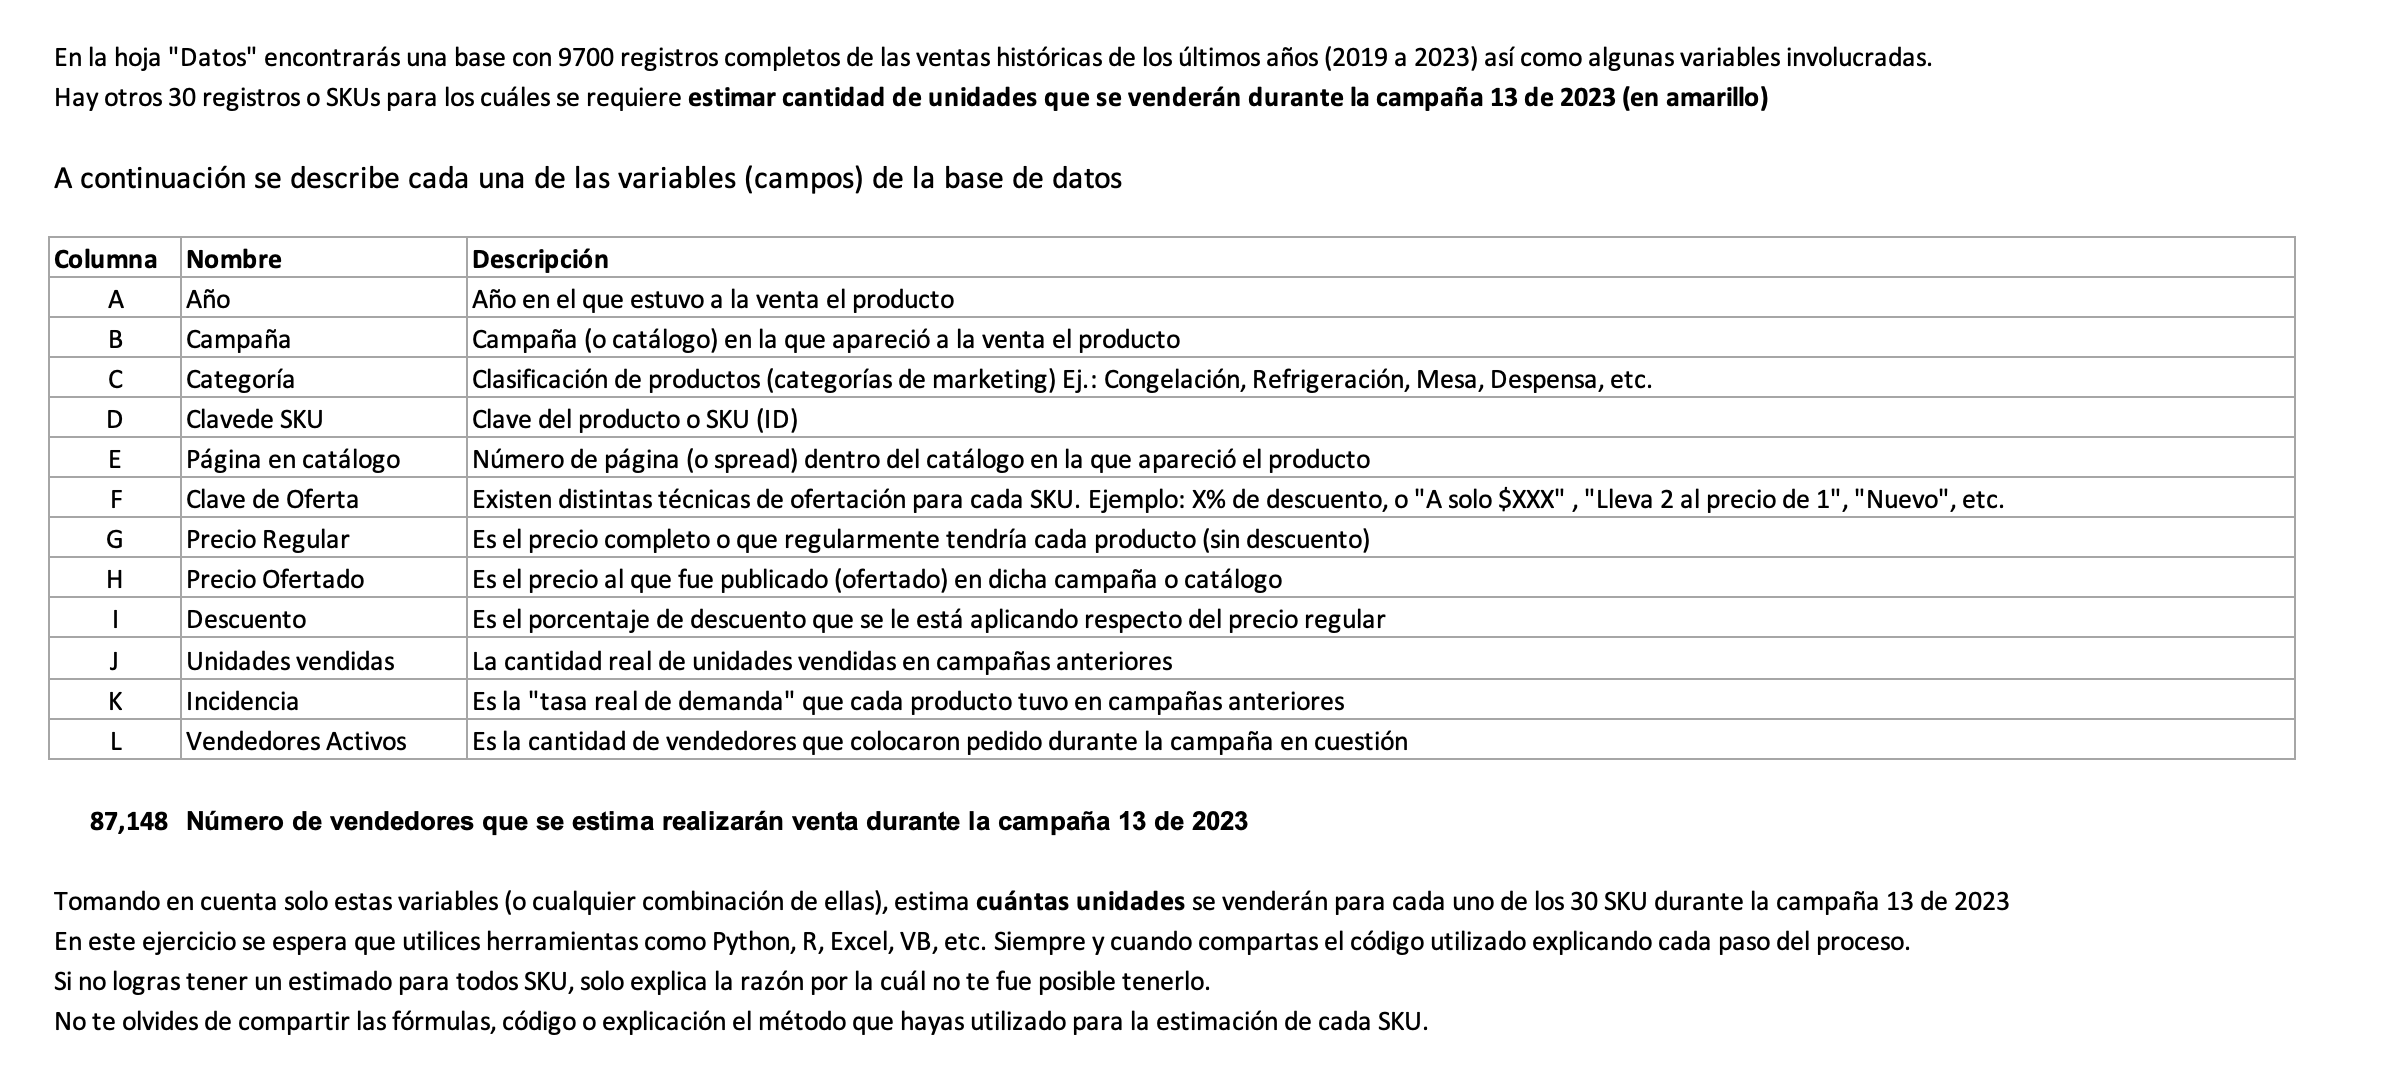

In [102]:
!pip install shap umap-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.8/90.8 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.4-py3-none-any.whl size=86770 sha256=6b8c51090c1adedadb1e741d563f0d972dddd29713320b36bf3bcea65dc75776
  Stored in directory: /root/.cache/pip/wheels/fb/66/29/199acf5784d0f7b8add6d466175ab45506c96e386ed5dd0633
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55615 sha256=5d6d373bdb2661fc9d2093109a8f1bfcdfc355f559051d0723d73363b4b24451
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be97d135f1096
Successfully built umap-learn pynndescent


In [2]:
import pandas as pd
import numpy as np
# Replace 'your_excel_file.xlsx' with the path to your Excel file
excel_file_path = '/content/Base SKUs ejemplo para fcst.xlsm'

# Load the Excel file
xls = pd.ExcelFile(excel_file_path)

# Get the name of the second sheet
second_sheet_name = xls.sheet_names[1]  # Sheets are 0-indexed

# Read the second sheet to a DataFrame
df_second_sheet = pd.read_excel(xls, sheet_name=second_sheet_name)

# Now you can work with the DataFrame 'df_second_sheet'
df_second_sheet


# Reemplazar caracteres de nueva línea y otros caracteres no deseados en los nombres de las columnas
df_second_sheet.columns = [col.replace('\n', ' ').replace('\\n', ' ').replace('\\', '').strip() for col in df_second_sheet.columns]

# Si necesitas también normalizar los acentos y caracteres especiales al equivalente ASCII más cercano:
import unicodedata
df_second_sheet.columns = [''.join((c for c in unicodedata.normalize('NFD', col) if unicodedata.category(c) != 'Mn')) for col in df_second_sheet.columns]

1. Dividir los dataset

In [3]:
df=  df_second_sheet

In [4]:
def corregir_acentos(columnas):
    reemplazos = {
        'Ano': 'Año',
        'Campana': 'Campaña',
        'Categoria': 'Categoría',
        'Clave de Ofertacion':'Clave de Ofertación',
        'Clave de SKU': 'Clave de SKU', # Si ya está bien, no es necesario cambiarlo
        'Pagina en catalogo': 'Página en catálogo',
        'Clave de Operacion': 'Clave de Operación',
        'Precio Regular': 'Precio Regular', # Si ya está bien, no es necesario cambiarlo
        'Precio Ofertado': 'Precio Ofertado', # Si ya está bien, no es necesario cambiarlo
        'Descuento': 'Descuento', # Si ya está bien, no es necesario cambiarlo
        'Unidades vendidas': 'Unidades vendidas', # Si ya está bien, no es necesario cambiarlo
        'Incidencia': 'Incidencia', # Si ya está bien, no es necesario cambiarlo
        'Vendedores Activos': 'Vendedores Activos' # Si ya está bien, no es necesario cambiarlo
    }
    columnas_corregidas = [reemplazos.get(col, col) for col in columnas]
    return columnas_corregidas

df.columns = corregir_acentos(df.columns)
df

Año  Campaña Categoría Clave de SKU Página en catálogo  \
0     2019        1         A          A01              48/49   
1     2019        1         A          A02              48/49   
2     2019        1         A          A03              48/49   
3     2019        1         A          A04              48/49   
4     2019        1         A         A133              48/49   
...    ...      ...       ...          ...                ...   
9725  2023       13         K          K09              06/07   
9726  2023       13         T        T1031              54/55   
9727  2023       13         T        T1095              72/73   
9728  2023       13         T         T163              52/53   
9729  2023       13         T         T947              68/69   

     Clave de Ofertación  Precio Regular  Precio Ofertado  Descuento  \
0                     ND           105.9            105.9   0.000000   
1                     ND           116.9            116.9   0.000000   
2                     ND           123.9            123.9   0.000000   
3                     ND           136.9            136.9   0.000000   
4                     PQ           483.6            239.9   0.503929   
...                  ...             ...              ...        ...   
9725                40%D           289.9            169.9   0.413936   
9726                 AAS           129.9             99.9   0.230947   
9727                10%D           169.9            149.9   0.117716   
9728                 AAS           189.9             89.9   0.526593   
9729                 AAS           134.9             79.9   0.407709   

      Unidades vendidas  Incidencia  Vendedores Activos  
0                 127.0    0.001570               80914  
1                 209.0    0.002583               80914  
2                 314.0    0.003881               80914  
3                 352.0    0.004350               80914  
4               17327.0    0.214141               80914  
...                 ...         ...                 ...  
9725                NaN    0.000000               87148  
9726                NaN    0.000000               87148  
9727                NaN    0.000000               87148  
9728                NaN    0.000000               87148  
9729                NaN    0.000000               87148  

[9730 rows x 12 columns]

In [5]:
df['Año']

0       2019
1       2019
2       2019
3       2019
4       2019
        ... 
9725    2023
9726    2023
9727    2023
9728    2023
9729    2023
Name: Año, Length: 9730, dtype: int64

In [6]:
df.columns

Index(['Año', 'Campaña', 'Categoría', 'Clave de SKU', 'Página en catálogo',
       'Clave de Ofertación', 'Precio Regular', 'Precio Ofertado', 'Descuento',
       'Unidades vendidas', 'Incidencia', 'Vendedores Activos'],
      dtype='object')

In [7]:
df['Unidades vendidas']

0         127.0
1         209.0
2         314.0
3         352.0
4       17327.0
         ...   
9725        NaN
9726        NaN
9727        NaN
9728        NaN
9729        NaN
Name: Unidades vendidas, Length: 9730, dtype: float64

In [8]:
9731-9702 +1

30

In [9]:
# Contar los valores NaN en la columna 'Unidades vendidas'
nans_unidades_vendidas = df['Unidades vendidas'].isna().sum()
print('nans en el dataset', nans_unidades_vendidas)
print("en el excel es 9731-9702 = 30 it's not ok")


nans en el dataset 31
en el excel es 9731-9702 = 30 it's not ok


#Separacion para validación final
`val_final`

- podemos estar tranquilos de usar los numeros de los indices como registro


- hay un dato faltante en el indice 4248 en la columna de `df['Unidades vendidas']`

- Se elminará registro

In [10]:
val_final= df[df['Unidades vendidas'].isna()]
val_final

Año  Campaña Categoría Clave de SKU Página en catálogo  \
4248  2021        1         N       N18775              36/37   
9700  2023       13         A         A588              22/23   
9701  2023       13         A         A589              22/23   
9702  2023       13         A         A590              22/23   
9703  2023       13         B         B320              78/79   
9704  2023       13         D          D39              30/31   
9705  2023       13         D         D933              80/81   
9706  2023       13         E         E142              36/37   
9707  2023       13         E          E17              40/41   
9708  2023       13         E         E208              38/39   
9709  2023       13         E          E55              38/39   
9710  2023       13         F         F166              74/75   
9711  2023       13         F          F20              48/49   
9712  2023       13         F         F250              46/47   
9713  2023       13         F         F404              76/77   
9714  2023       13         F          F64              50/51   
9715  2023       13         F         F667              78/79   
9716  2023       13         F         F771              72/73   
9717  2023       13         F         F964              50/51   
9718  2023       13         G          G14              08/09   
9719  2023       13         G          G30              70/71   
9720  2023       13         G         G406              10/11   
9721  2023       13         G         G941              42/43   
9722  2023       13         J         J164              56/57   
9723  2023       13         J         J167              56/57   
9724  2023       13         K          K08              06/07   
9725  2023       13         K          K09              06/07   
9726  2023       13         T        T1031              54/55   
9727  2023       13         T        T1095              72/73   
9728  2023       13         T         T163              52/53   
9729  2023       13         T         T947              68/69   

     Clave de Ofertación  Precio Regular  Precio Ofertado  Descuento  \
4248                  ND            0.02             0.02   0.000000   
9700                  NR          289.90           209.90   0.275957   
9701                  NR          299.90           219.90   0.266756   
9702                  NR          334.90           249.90   0.253807   
9703                 AAS           44.90            19.90   0.556793   
9704                35%D          269.90           169.90   0.370508   
9705                25%D          109.90            79.90   0.272975   
9706                10%D          349.90           314.90   0.100029   
9707                15%D          244.90           199.90   0.183748   
9708                10%D          524.90           466.90   0.110497   
9709                10%D          317.90           284.90   0.103806   
9710                30%D          239.90           164.90   0.312630   
9711                30%D          399.90           279.90   0.300075   
9712                20%D          324.90           259.90   0.200062   
9713                10%D          499.90           439.90   0.120024   
9714                10%D          429.90           386.90   0.100023   
9715                20%D          154.90           119.90   0.225952   
9716                30%D          299.90           199.90   0.333444   
9717                  ND          419.90           419.90   0.000000   
9718                10%D          409.90           368.90   0.100024   
9719                20%D          559.90           439.90   0.214324   
9720                25%D          264.90           189.90   0.283126   
9721                15%D          389.90           329.90   0.153886   
9722                25%D          269.90           199.90   0.259355   
9723                35%D          254.90           159.90   0.372695   
9724                40%D          279.90           159

`val_final` listo ok ya elminado en el siguiente codigo

In [11]:
val_final=val_final.drop(4248)

# Convertimos la columna 'Año' a tipo entero para evitar años en decimales
val_final['Año'] = val_final['Año'].astype(int)
val_final

Año  Campaña Categoría Clave de SKU Página en catálogo  \
9700  2023       13         A         A588              22/23   
9701  2023       13         A         A589              22/23   
9702  2023       13         A         A590              22/23   
9703  2023       13         B         B320              78/79   
9704  2023       13         D          D39              30/31   
9705  2023       13         D         D933              80/81   
9706  2023       13         E         E142              36/37   
9707  2023       13         E          E17              40/41   
9708  2023       13         E         E208              38/39   
9709  2023       13         E          E55              38/39   
9710  2023       13         F         F166              74/75   
9711  2023       13         F          F20              48/49   
9712  2023       13         F         F250              46/47   
9713  2023       13         F         F404              76/77   
9714  2023       13         F          F64              50/51   
9715  2023       13         F         F667              78/79   
9716  2023       13         F         F771              72/73   
9717  2023       13         F         F964              50/51   
9718  2023       13         G          G14              08/09   
9719  2023       13         G          G30              70/71   
9720  2023       13         G         G406              10/11   
9721  2023       13         G         G941              42/43   
9722  2023       13         J         J164              56/57   
9723  2023       13         J         J167              56/57   
9724  2023       13         K          K08              06/07   
9725  2023       13         K          K09              06/07   
9726  2023       13         T        T1031              54/55   
9727  2023       13         T        T1095              72/73   
9728  2023       13         T         T163              52/53   
9729  2023       13         T         T947              68/69   

     Clave de Ofertación  Precio Regular  Precio Ofertado  Descuento  \
9700                  NR           289.9            209.9   0.275957   
9701                  NR           299.9            219.9   0.266756   
9702                  NR           334.9            249.9   0.253807   
9703                 AAS            44.9             19.9   0.556793   
9704                35%D           269.9            169.9   0.370508   
9705                25%D           109.9             79.9   0.272975   
9706                10%D           349.9            314.9   0.100029   
9707                15%D           244.9            199.9   0.183748   
9708                10%D           524.9            466.9   0.110497   
9709                10%D           317.9            284.9   0.103806   
9710                30%D           239.9            164.9   0.312630   
9711                30%D           399.9            279.9   0.300075   
9712                20%D           324.9            259.9   0.200062   
9713                10%D           499.9            439.9   0.120024   
9714                10%D           429.9            386.9   0.100023   
9715                20%D           154.9            119.9   0.225952   
9716                30%D           299.9            199.9   0.333444   
9717                  ND           419.9            419.9   0.000000   
9718                10%D           409.9            368.9   0.100024   
9719                20%D           559.9            439.9   0.214324   
9720                25%D           264.9            189.9   0.283126   
9721                15%D           389.9            329.9   0.153886   
9722                25%D           269.9            199.9   0.259355   
9723                35%D           254.9            159.9   0.372695   
9724                40%D           279.9            159.9   0.428725   
9725                40%D           289.9            169.9   0.413936   
9726                 AAS           129.9       

QUE SKUS estan en los predecir? de la informacion que eiliminaron para la preduccion en esta prueba no tiene caso hacer un modelo si no existen (borraron) en ese tiempo...

In [127]:
val_final['Clave de SKU'].unique()

array(['A588', 'A589', 'A590', 'B320', 'D39', 'D933', 'E142', 'E17',
       'E208', 'E55', 'F166', 'F20', 'F250', 'F404', 'F64', 'F667',
       'F771', 'F964', 'G14', 'G30', 'G406', 'G941', 'J164', 'J167',
       'K08', 'K09', 'T1031', 'T1095', 'T163', 'T947'], dtype=object)

la variable `dataset` sera la variable con la que empezaremos a depurar y analizar

In [12]:
dataset= df[~df['Unidades vendidas'].isna()]
dataset['Año'] = dataset['Año'].astype(int)
dataset

<ipython-input-12-e2c0f3409cc1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Año'] = dataset['Año'].astype(int)


Año  Campaña Categoría Clave de SKU Página en catálogo  \
0     2019        1         A          A01              48/49   
1     2019        1         A          A02              48/49   
2     2019        1         A          A03              48/49   
3     2019        1         A          A04              48/49   
4     2019        1         A         A133              48/49   
...    ...      ...       ...          ...                ...   
9695  2023       11         U         U947              60/61   
9696  2023       11         W        W1190              14/15   
9697  2023       11         W        W1190              14/15   
9698  2023       11         Y        Y1103              08/09   
9699  2023       11         Y        Y1103              08/09   

     Clave de Ofertación  Precio Regular  Precio Ofertado  Descuento  \
0                     ND           105.9            105.9   0.000000   
1                     ND           116.9            116.9   0.000000   
2                     ND           123.9            123.9   0.000000   
3                     ND           136.9            136.9   0.000000   
4                     PQ           483.6            239.9   0.503929   
...                  ...             ...              ...        ...   
9695                25%D           159.9            119.9   0.250156   
9696                 AAS            59.9             39.9   0.333890   
9697                 AAS            59.9             39.9   0.333890   
9698                  PQ           329.8            199.9   0.393875   
9699                  PQ           329.8            199.9   0.393875   

      Unidades vendidas  Incidencia  Vendedores Activos  
0                 127.0    0.001570               80914  
1                 209.0    0.002583               80914  
2                 314.0    0.003881               80914  
3                 352.0    0.004350               80914  
4               17327.0    0.214141               80914  
...                 ...         ...                 ...  
9695             2328.0    0.028829               80753  
9696             8137.0    0.100764               80753  
9697             7682.0    0.095130               80753  
9698            30797.0    0.381373               80753  
9699            37761.0    0.467611               80753  

[9699 rows x 12 columns]

#Exploratory Data Analysis#
The goal is to examine the distributions of the SKU keys before performing any modeling.





In [13]:
dataset

Año  Campaña Categoría Clave de SKU Página en catálogo  \
0     2019        1         A          A01              48/49   
1     2019        1         A          A02              48/49   
2     2019        1         A          A03              48/49   
3     2019        1         A          A04              48/49   
4     2019        1         A         A133              48/49   
...    ...      ...       ...          ...                ...   
9695  2023       11         U         U947              60/61   
9696  2023       11         W        W1190              14/15   
9697  2023       11         W        W1190              14/15   
9698  2023       11         Y        Y1103              08/09   
9699  2023       11         Y        Y1103              08/09   

     Clave de Ofertación  Precio Regular  Precio Ofertado  Descuento  \
0                     ND           105.9            105.9   0.000000   
1                     ND           116.9            116.9   0.000000   
2                     ND           123.9            123.9   0.000000   
3                     ND           136.9            136.9   0.000000   
4                     PQ           483.6            239.9   0.503929   
...                  ...             ...              ...        ...   
9695                25%D           159.9            119.9   0.250156   
9696                 AAS            59.9             39.9   0.333890   
9697                 AAS            59.9             39.9   0.333890   
9698                  PQ           329.8            199.9   0.393875   
9699                  PQ           329.8            199.9   0.393875   

      Unidades vendidas  Incidencia  Vendedores Activos  
0                 127.0    0.001570               80914  
1                 209.0    0.002583               80914  
2                 314.0    0.003881               80914  
3                 352.0    0.004350               80914  
4               17327.0    0.214141               80914  
...                 ...         ...                 ...  
9695             2328.0    0.028829               80753  
9696             8137.0    0.100764               80753  
9697             7682.0    0.095130               80753  
9698            30797.0    0.381373               80753  
9699            37761.0    0.467611               80753  

[9699 rows x 12 columns]

In [14]:
# Verificar si hay datos faltantes (NaN o None) en el DataFrame
missing_data = dataset.isnull().sum()

# Mostrar el número de datos faltantes por columna
print("Número de datos faltantes por columna:")
print(missing_data)

# También puedes verificar si hay datos faltantes en cualquier lugar del DataFrame
if df.isnull().values.any():
    print("Hay datos faltantes en el DataFrame.")
else:
    print("No hay datos faltantes en el DataFrame.")

print('no es tan malo la falta de info, lo dejaremos como categoria NA ')

Número de datos faltantes por columna:
Año                     0
Campaña                 0
Categoría              27
Clave de SKU            0
Página en catálogo      0
Clave de Ofertación     0
Precio Regular          0
Precio Ofertado         0
Descuento               0
Unidades vendidas       0
Incidencia              0
Vendedores Activos      0
dtype: int64
Hay datos faltantes en el DataFrame.
no es tan malo la falta de info, lo dejaremos como categoria NA 


In [15]:
dataset.fillna("no aplica",inplace=True)
# Verificar si hay datos faltantes (NaN o None) en el DataFrame
missing_data = dataset.isnull().sum()

# Mostrar el número de datos faltantes por columna
print("Número de datos faltantes por columna:")
print(missing_data)

# También puedes verificar si hay datos faltantes en cualquier lugar del DataFrame
if df.isnull().values.any():
    print("Hay datos faltantes en el DataFrame.")
else:
    print("No hay datos faltantes en el DataFrame.")


Número de datos faltantes por columna:
Año                    0
Campaña                0
Categoría              0
Clave de SKU           0
Página en catálogo     0
Clave de Ofertación    0
Precio Regular         0
Precio Ofertado        0
Descuento              0
Unidades vendidas      0
Incidencia             0
Vendedores Activos     0
dtype: int64
Hay datos faltantes en el DataFrame.


<ipython-input-15-9af0f0ba459d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.fillna("no aplica",inplace=True)


**Frecuencia de cada SKU:**
Si utilizaremos la tendencia y el ocmportamiento de atraves de los años tenemos que saber como la frecuencia (registros) por cada sku existe atraves de los años..

**Nos quedamos threshold de 5 al menos por año**

esto indica que debe aparecer un registro de sky como mínimo 5 en cada año

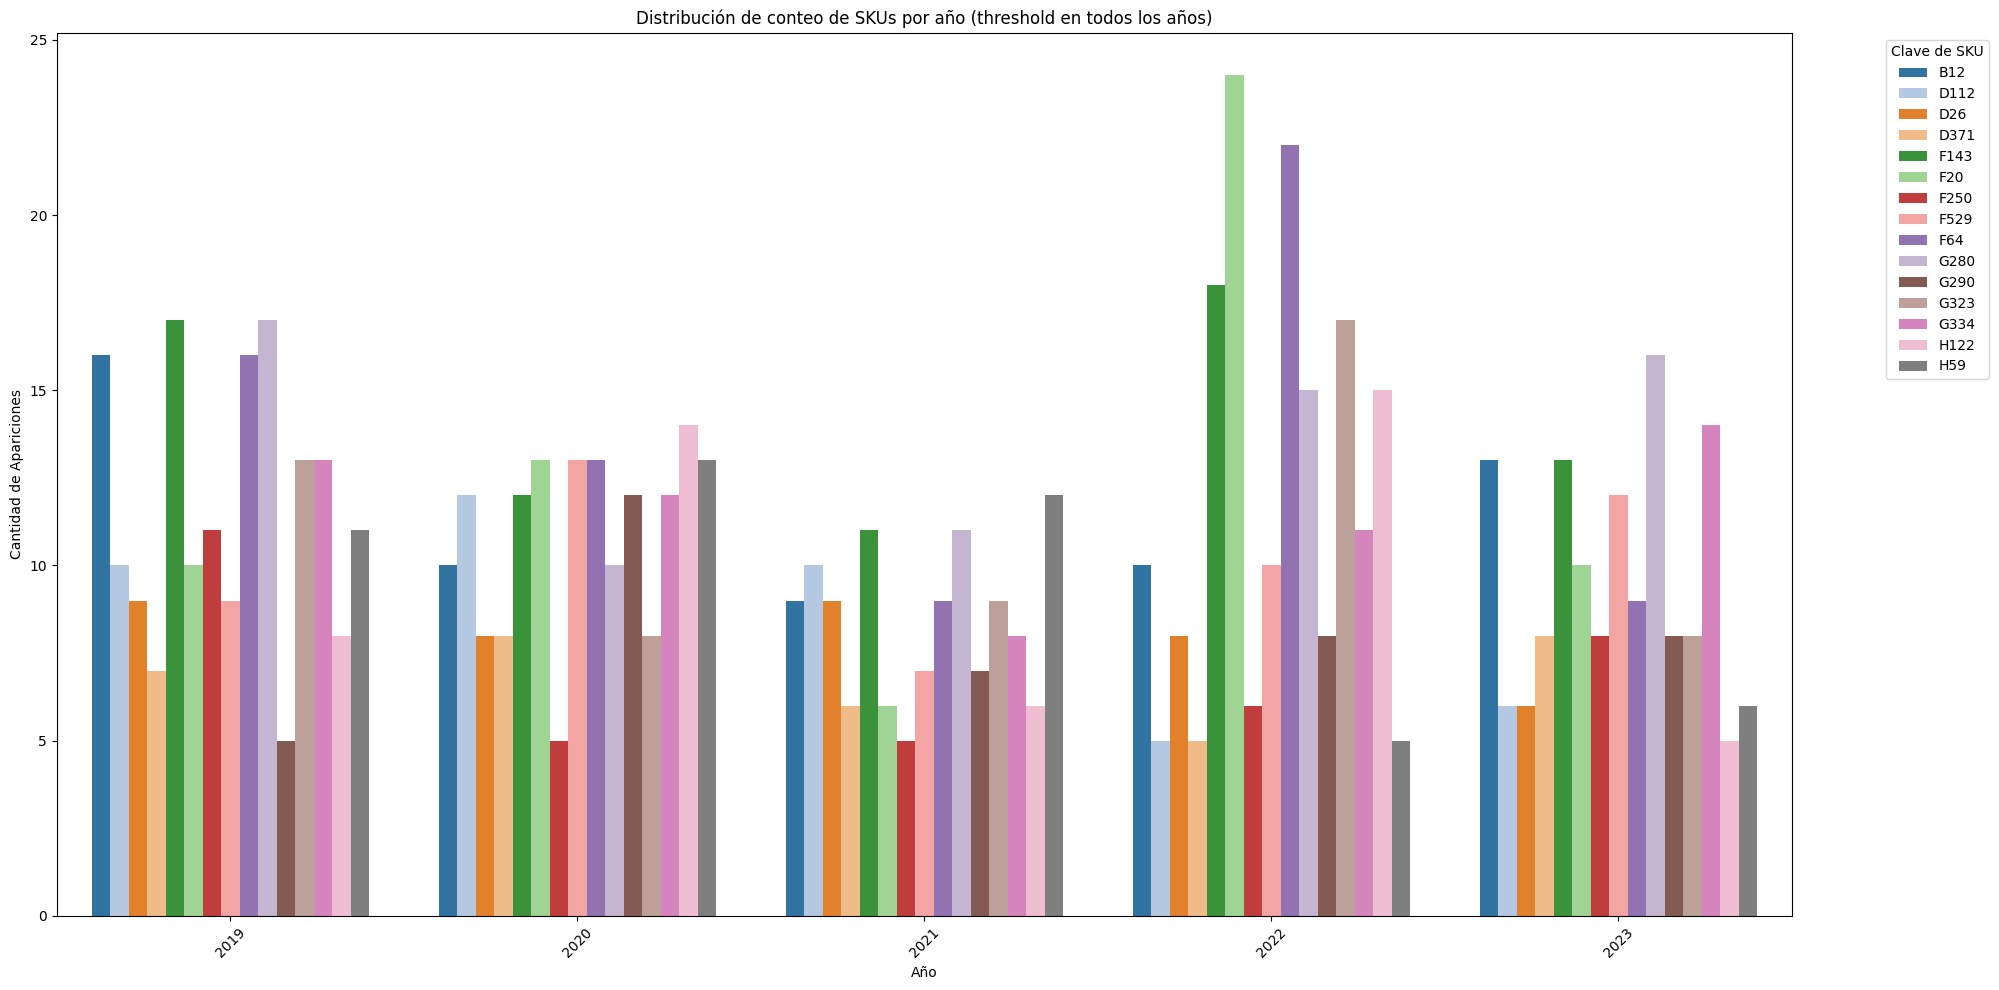

In [135]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Suponiendo que 'dataset' es tu DataFrame.

# Agrupar por SKU y Año y contar las apariciones
sku_counts = dataset.groupby(['Clave de SKU', 'Año']).size().reset_index(name='counts')

# Filtrar SKUs que aparecen 'threshold' o más veces cada año
threshold = 5

# Asegúrate de que cada SKU aparezca al menos 'threshold' veces cada año en todos los años del dataset
# Primero, filtramos para garantizar que el conteo es al menos el threshold
above_threshold = sku_counts[sku_counts['counts'] >= threshold]

# Luego, nos aseguramos de que cada SKU aparezca en todos los años
unique_years = dataset['Año'].nunique()
filtered_skus = above_threshold.groupby('Clave de SKU').filter(lambda x: x['Año'].nunique() == unique_years)

# Ahora, creamos la gráfica de barras con todos los SKUs por cada año
plt.figure(figsize=(20, 10))
sns.barplot(data=filtered_skus, x='Año', y='counts', hue='Clave de SKU', palette='tab20')

# Mejorar la legibilidad
plt.title('Distribución de conteo de SKUs por año (threshold en todos los años)')
plt.xticks(rotation=45)
plt.xlabel('Año')
plt.ylabel('Cantidad de Apariciones')
plt.legend(title='Clave de SKU', bbox_to_anchor=(1.05, 1), loc='upper left')

# Ajustar el layout y mostrar el gráfico
plt.tight_layout()
plt.show()



In [136]:
# Suponiendo que 'filtered_skus' es tu DataFrame actual.

# Agrupamos por 'Año' y sumamos las 'counts'
yearly_counts = filtered_skus.groupby('Año')['counts'].sum().reset_index()

print(yearly_counts)


    Año  counts
0  2019     172
1  2020     163
2  2021     125
3  2022     179
4  2023     142


In [137]:
val_final['Clave de SKU'].unique()

array(['A588', 'A589', 'A590', 'B320', 'D39', 'D933', 'E142', 'E17',
       'E208', 'E55', 'F166', 'F20', 'F250', 'F404', 'F64', 'F667',
       'F771', 'F964', 'G14', 'G30', 'G406', 'G941', 'J164', 'J167',
       'K08', 'K09', 'T1031', 'T1095', 'T163', 'T947'], dtype=object)

In [138]:
sku_total_counts_sorted['Clave de SKU']

1    F143
3     F64
4    G280
0     B12
6    G334
5    G323
2    F529
Name: Clave de SKU, dtype: object

INTERESECCION EN EL DATASET DE VALIDACION APARECEN EN LOS SKUS DE LOS BORRADOS en el exel que quieren que se predigan?

In [139]:
import numpy as np

# Asumiendo que estos son tus dos arrays (o listas):
array1 = val_final['Clave de SKU'].unique()
array2 = sku_total_counts_sorted['Clave de SKU']

# Calcular la intersección de los dos arrays
intersection = np.intersect1d(array1, array2)
print(intersection)
print('SOLO APARECE UNO')


['F64']
SOLO APARECE UNO


In [295]:
# Agrupa por 'Clave de SKU' y suma las contadas
sku_total_counts = filtered_skus.groupby('Clave de SKU')['counts'].sum().reset_index()

# Ordena los resultados por el número total de contadas de mayor a menor
sku_total_counts_sorted = sku_total_counts.sort_values(by='counts', ascending=False)

# Mostrar los resultados
sku_total_counts_sorted


Clave de SKU  counts
4          F143      71
8           F64      69
9          G280      69
5           F20      63
0           B12      58
12         G334      58
11         G323      55
7          F529      51
13         H122      48
14          H59      47
1          D112      43
2           D26      40
10         G290      40
6          F250      35
3          D371      34

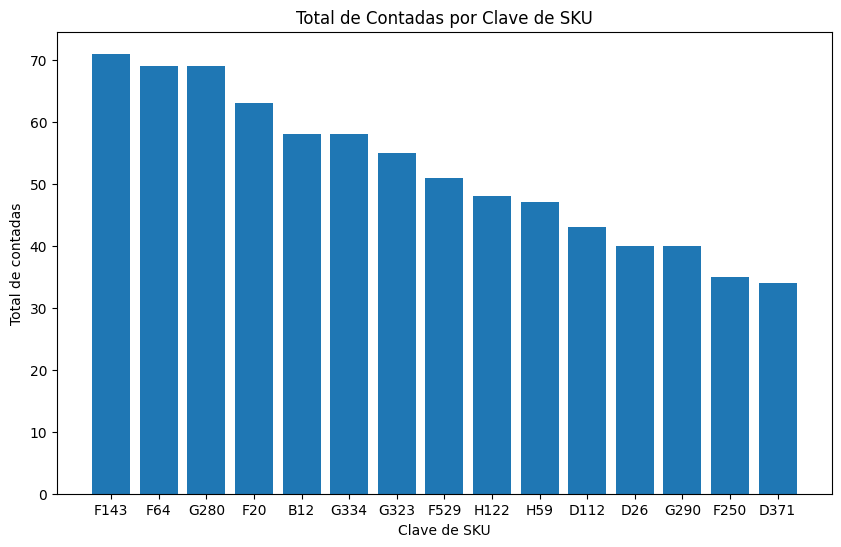

In [300]:
import matplotlib.pyplot as plt

# Especifica el tamaño de la figura (ancho, alto) en pulgadas
fig = plt.figure(figsize=(10, 6))

# Crea el gráfico de barras
ax = fig.add_subplot(111)
ax.bar(sku_total_counts_sorted['Clave de SKU'], sku_total_counts_sorted['counts'])

# Establece las etiquetas y títulos
ax.set_xlabel('Clave de SKU')
ax.set_ylabel('Total de contadas')
ax.set_title('Total de Contadas por Clave de SKU')

# Muestra el gráfico
plt.show()


In [20]:
unique_skus = filtered_skus['Clave de SKU'].unique()
filtered_dataset = dataset[dataset['Clave de SKU'].isin(unique_skus)]
filtered_dataset

Año  Campaña Categoría Clave de SKU Página en catálogo  \
11    2019        1         B          B12              18/19   
39    2019        1         F         F143      CONTRAPORTADA   
51    2019        1         F         F529              32/33   
57    2019        1         G         G280              12/13   
58    2019        1         G         G280              12/13   
...    ...      ...       ...          ...                ...   
9613  2023       11         G         G280              16/17   
9616  2023       11         G         G334              14/15   
9617  2023       11         G         G334              14/15   
9618  2023       11         G         G334              14/15   
9619  2023       11         G         G334              14/15   

     Clave de Ofertación  Precio Regular  Precio Ofertado  Descuento  \
11                  15%D           133.9            112.9   0.156833   
39                   AAS           109.9             59.9   0.454959   
51                    ND           231.9            231.9   0.000000   
57                  10%D           174.9            154.9   0.114351   
58                  10%D           174.9            154.9   0.114351   
...                  ...             ...              ...        ...   
9613                30%D           214.9            149.9   0.302466   
9616                $AGR           174.9             89.9   0.485992   
9617                $AGR           174.9             89.9   0.485992   
9618                $AGR           174.9             89.9   0.485992   
9619                $AGR           174.9             89.9   0.485992   

      Unidades vendidas  Incidencia  Vendedores Activos  
11              22381.0    0.276602               80914  
39              61566.0    0.760882               80914  
51              16086.0    0.198804               80914  
57              26228.0    0.324147               80914  
58              44258.0    0.546976               80914  
...                 ...         ...                 ...  
9613            17772.0    0.220079               80753  
9616                0.0    0.000000               80753  
9617                0.0    0.000000               80753  
9618            87465.0    1.083118               80753  
9619                0.0    0.000000               80753  

[431 rows x 12 columns]

In [21]:
sku_total_counts_sorted

Clave de SKU  counts
1         F143      71
3          F64      69
4         G280      69
0          B12      58
6         G334      58
5         G323      55
2         F529      51

#ONE HOT ENCODDING GENERAL

Ya como hicimos el EDA ahora aremos el onehot coding para todo:



In [169]:
df

Año  Campaña Categoría Clave de SKU Página en catálogo  \
0     2019        1         A          A01              48/49   
1     2019        1         A          A02              48/49   
2     2019        1         A          A03              48/49   
3     2019        1         A          A04              48/49   
4     2019        1         A         A133              48/49   
...    ...      ...       ...          ...                ...   
9725  2023       13         K          K09              06/07   
9726  2023       13         T        T1031              54/55   
9727  2023       13         T        T1095              72/73   
9728  2023       13         T         T163              52/53   
9729  2023       13         T         T947              68/69   

     Clave de Ofertación  Precio Regular  Precio Ofertado  Descuento  \
0                     ND           105.9            105.9   0.000000   
1                     ND           116.9            116.9   0.000000   
2                     ND           123.9            123.9   0.000000   
3                     ND           136.9            136.9   0.000000   
4                     PQ           483.6            239.9   0.503929   
...                  ...             ...              ...        ...   
9725                40%D           289.9            169.9   0.413936   
9726                 AAS           129.9             99.9   0.230947   
9727                10%D           169.9            149.9   0.117716   
9728                 AAS           189.9             89.9   0.526593   
9729                 AAS           134.9             79.9   0.407709   

      Unidades vendidas  Incidencia  Vendedores Activos  
0                 127.0    0.001570               80914  
1                 209.0    0.002583               80914  
2                 314.0    0.003881               80914  
3                 352.0    0.004350               80914  
4               17327.0    0.214141               80914  
...                 ...         ...                 ...  
9725                NaN    0.000000               87148  
9726                NaN    0.000000               87148  
9727                NaN    0.000000               87148  
9728                NaN    0.000000               87148  
9729                NaN    0.000000               87148  

[9730 rows x 12 columns]

In [170]:
categorical_columns = ['Campaña', 'Categoría', 'Página en catálogo', 'Clave de Ofertación']
df_onehot = pd.get_dummies(df, columns=categorical_columns)

In [171]:
df_onehot

Año Clave de SKU  Precio Regular  Precio Ofertado  Descuento  \
0     2019          A01           105.9            105.9   0.000000   
1     2019          A02           116.9            116.9   0.000000   
2     2019          A03           123.9            123.9   0.000000   
3     2019          A04           136.9            136.9   0.000000   
4     2019         A133           483.6            239.9   0.503929   
...    ...          ...             ...              ...        ...   
9725  2023          K09           289.9            169.9   0.413936   
9726  2023        T1031           129.9             99.9   0.230947   
9727  2023        T1095           169.9            149.9   0.117716   
9728  2023         T163           189.9             89.9   0.526593   
9729  2023         T947           134.9             79.9   0.407709   

      Unidades vendidas  Incidencia  Vendedores Activos  Campaña_1  Campaña_2  \
0                 127.0    0.001570               80914          1          0   
1                 209.0    0.002583               80914          1          0   
2                 314.0    0.003881               80914          1          0   
3                 352.0    0.004350               80914          1          0   
4               17327.0    0.214141               80914          1          0   
...                 ...         ...                 ...        ...        ...   
9725                NaN    0.000000               87148          0          0   
9726                NaN    0.000000               87148          0          0   
9727                NaN    0.000000               87148          0          0   
9728                NaN    0.000000               87148          0          0   
9729                NaN    0.000000               87148          0          0   

      ...  Clave de Ofertación_ND  Clave de Ofertación_NR  \
0     ...                       1                       0   
1     ...                       1                       0   
2     ...                       1                       0   
3     ...                       1                       0   
4     ...                       0                       0   
...   ...                     ...                     ...   
9725  ...                       0                       0   
9726  ...                       0                       0   
9727  ...                       0                       0   
9728  ...                       0                       0   
9729  ...                       0                       0   

      Clave de Ofertación_NVCO  Clave de Ofertación_NVO  \
0                            0                        0   
1                            0                        0   
2                            0                        0   
3                            0                        0   
4                            0                        0   
...                        ...                      ...   
9725                         0                        0   
9726                         0                        0   
9727                         0                        0   
9728                         0                        0   
9729                         0                        0   

      Clave de Ofertación_NVOPQ  Clave de Ofertación_PQ  \
0                             0                       0   
1                             0                       0   
2                             0                       0   
3                             0                       0   
4                             0                       1   
...                         ...                     ...   
9725                          0                       0   
9726                          0                       0   
9727                          0                       0   
9728                          0                       0   
9729                          0                       0   

      Clave de Ofertación_PQ20

In [180]:
df_onehot=df_onehot.drop(4248) #por el eda ya sabemos que tenemos que eliminar este

In [181]:


# Verificar si hay datos faltantes (NaN o None) en el DataFrame
missing_data = df_onehot.isnull().sum()

# Mostrar el número de datos faltantes por columna
print("Número de datos faltantes por columna:")
print(missing_data)

# También puedes verificar si hay datos faltantes en cualquier lugar del DataFrame
if df.isnull().values.any():
    print("Hay datos faltantes en el DataFrame.")
else:
    print("No hay datos faltantes en el DataFrame.")

print('no es tan malo la falta de info, lo dejaremos como categoria NA ')

Número de datos faltantes por columna:
Año                           0
Clave de SKU                  0
Precio Regular                0
Precio Ofertado               0
Descuento                     0
                             ..
Clave de Ofertación_PQ        0
Clave de Ofertación_PQ20%     0
Clave de Ofertación_PQGT      0
Clave de Ofertación_RECUAD    0
Clave de Ofertación_SSS       0
Length: 147, dtype: int64
Hay datos faltantes en el DataFrame.
no es tan malo la falta de info, lo dejaremos como categoria NA 


In [182]:
pd.DataFrame(missing_data)[0].sort_values(ascending=False)

Unidades vendidas           30
Año                          0
Página en catálogo_74/75     0
Página en catálogo_60/61     0
Página en catálogo_62/63     0
                            ..
Categoría_T                  0
Categoría_U                  0
Categoría_W                  0
Categoría_Y                  0
Clave de Ofertación_SSS      0
Name: 0, Length: 147, dtype: int64

In [205]:
df_onehot

Año Clave de SKU  Precio Regular  Precio Ofertado  Descuento  \
0     2019          A01           105.9            105.9   0.000000   
1     2019          A02           116.9            116.9   0.000000   
2     2019          A03           123.9            123.9   0.000000   
3     2019          A04           136.9            136.9   0.000000   
4     2019         A133           483.6            239.9   0.503929   
...    ...          ...             ...              ...        ...   
9725  2023          K09           289.9            169.9   0.413936   
9726  2023        T1031           129.9             99.9   0.230947   
9727  2023        T1095           169.9            149.9   0.117716   
9728  2023         T163           189.9             89.9   0.526593   
9729  2023         T947           134.9             79.9   0.407709   

      Unidades vendidas  Incidencia  Vendedores Activos  Campaña_1  Campaña_2  \
0                 127.0    0.001570               80914          1          0   
1                 209.0    0.002583               80914          1          0   
2                 314.0    0.003881               80914          1          0   
3                 352.0    0.004350               80914          1          0   
4               17327.0    0.214141               80914          1          0   
...                 ...         ...                 ...        ...        ...   
9725                NaN    0.000000               87148          0          0   
9726                NaN    0.000000               87148          0          0   
9727                NaN    0.000000               87148          0          0   
9728                NaN    0.000000               87148          0          0   
9729                NaN    0.000000               87148          0          0   

      ...  Clave de Ofertación_ND  Clave de Ofertación_NR  \
0     ...                       1                       0   
1     ...                       1                       0   
2     ...                       1                       0   
3     ...                       1                       0   
4     ...                       0                       0   
...   ...                     ...                     ...   
9725  ...                       0                       0   
9726  ...                       0                       0   
9727  ...                       0                       0   
9728  ...                       0                       0   
9729  ...                       0                       0   

      Clave de Ofertación_NVCO  Clave de Ofertación_NVO  \
0                            0                        0   
1                            0                        0   
2                            0                        0   
3                            0                        0   
4                            0                        0   
...                        ...                      ...   
9725                         0                        0   
9726                         0                        0   
9727                         0                        0   
9728                         0                        0   
9729                         0                        0   

      Clave de Ofertación_NVOPQ  Clave de Ofertación_PQ  \
0                             0                       0   
1                             0                       0   
2                             0                       0   
3                             0                       0   
4                             0                       1   
...                         ...                     ...   
9725                          0                       0   
9726                          0                       0   
9727                          0                       0   
9728                          0                       0   
9729                          0                       0   

      Clave de Ofertación_PQ20

#Separacion con onehotencoding

In [206]:
dataset = df_onehot[~df_onehot['Unidades vendidas'].isna()]
dataset

Año Clave de SKU  Precio Regular  Precio Ofertado  Descuento  \
0     2019          A01           105.9            105.9   0.000000   
1     2019          A02           116.9            116.9   0.000000   
2     2019          A03           123.9            123.9   0.000000   
3     2019          A04           136.9            136.9   0.000000   
4     2019         A133           483.6            239.9   0.503929   
...    ...          ...             ...              ...        ...   
9695  2023         U947           159.9            119.9   0.250156   
9696  2023        W1190            59.9             39.9   0.333890   
9697  2023        W1190            59.9             39.9   0.333890   
9698  2023        Y1103           329.8            199.9   0.393875   
9699  2023        Y1103           329.8            199.9   0.393875   

      Unidades vendidas  Incidencia  Vendedores Activos  Campaña_1  Campaña_2  \
0                 127.0    0.001570               80914          1          0   
1                 209.0    0.002583               80914          1          0   
2                 314.0    0.003881               80914          1          0   
3                 352.0    0.004350               80914          1          0   
4               17327.0    0.214141               80914          1          0   
...                 ...         ...                 ...        ...        ...   
9695             2328.0    0.028829               80753          0          0   
9696             8137.0    0.100764               80753          0          0   
9697             7682.0    0.095130               80753          0          0   
9698            30797.0    0.381373               80753          0          0   
9699            37761.0    0.467611               80753          0          0   

      ...  Clave de Ofertación_ND  Clave de Ofertación_NR  \
0     ...                       1                       0   
1     ...                       1                       0   
2     ...                       1                       0   
3     ...                       1                       0   
4     ...                       0                       0   
...   ...                     ...                     ...   
9695  ...                       0                       0   
9696  ...                       0                       0   
9697  ...                       0                       0   
9698  ...                       0                       0   
9699  ...                       0                       0   

      Clave de Ofertación_NVCO  Clave de Ofertación_NVO  \
0                            0                        0   
1                            0                        0   
2                            0                        0   
3                            0                        0   
4                            0                        0   
...                        ...                      ...   
9695                         0                        0   
9696                         0                        0   
9697                         0                        0   
9698                         0                        0   
9699                         0                        0   

      Clave de Ofertación_NVOPQ  Clave de Ofertación_PQ  \
0                             0                       0   
1                             0                       0   
2                             0                       0   
3                             0                       0   
4                             0                       1   
...                         ...                     ...   
9695                          0                       0   
9696                          0                       0   
9697                          0                       0   
9698                          0                       1   
9699                          0                       1   

      Clave de Ofertación_PQ20

In [207]:
val_final= df_onehot[df_onehot['Unidades vendidas'].isna()]
val_final

Año Clave de SKU  Precio Regular  Precio Ofertado  Descuento  \
9700  2023         A588           289.9            209.9   0.275957   
9701  2023         A589           299.9            219.9   0.266756   
9702  2023         A590           334.9            249.9   0.253807   
9703  2023         B320            44.9             19.9   0.556793   
9704  2023          D39           269.9            169.9   0.370508   
9705  2023         D933           109.9             79.9   0.272975   
9706  2023         E142           349.9            314.9   0.100029   
9707  2023          E17           244.9            199.9   0.183748   
9708  2023         E208           524.9            466.9   0.110497   
9709  2023          E55           317.9            284.9   0.103806   
9710  2023         F166           239.9            164.9   0.312630   
9711  2023          F20           399.9            279.9   0.300075   
9712  2023         F250           324.9            259.9   0.200062   
9713  2023         F404           499.9            439.9   0.120024   
9714  2023          F64           429.9            386.9   0.100023   
9715  2023         F667           154.9            119.9   0.225952   
9716  2023         F771           299.9            199.9   0.333444   
9717  2023         F964           419.9            419.9   0.000000   
9718  2023          G14           409.9            368.9   0.100024   
9719  2023          G30           559.9            439.9   0.214324   
9720  2023         G406           264.9            189.9   0.283126   
9721  2023         G941           389.9            329.9   0.153886   
9722  2023         J164           269.9            199.9   0.259355   
9723  2023         J167           254.9            159.9   0.372695   
9724  2023          K08           279.9            159.9   0.428725   
9725  2023          K09           289.9            169.9   0.413936   
9726  2023        T1031           129.9             99.9   0.230947   
9727  2023        T1095           169.9            149.9   0.117716   
9728  2023         T163           189.9             89.9   0.526593   
9729  2023         T947           134.9             79.9   0.407709   

      Unidades vendidas  Incidencia  Vendedores Activos  Campaña_1  Campaña_2  \
9700                NaN         0.0               87148          0          0   
9701                NaN         0.0               87148          0          0   
9702                NaN         0.0               87148          0          0   
9703                NaN         0.0               87148          0          0   
9704                NaN         0.0               87148          0          0   
9705                NaN         0.0               87148          0          0   
9706                NaN         0.0               87148          0          0   
9707                NaN         0.0               87148          0          0   
9708                NaN         0.0               87148          0          0   
9709                NaN         0.0               87148          0          0   
9710                NaN         0.0               87148          0          0   
9711                NaN         0.0               87148          0          0   
9712                NaN         0.0               87148          0          0   
9713                NaN         0.0               87148          0          0   
9714                NaN         0.0               87148          0          0   
9715                NaN         0.0               87148          0          0   
9716                NaN         0.0               87148          0          0   
9717                NaN         0.0               87148          0          0   
9718                NaN         0.0               87148          0          0   
9719                NaN         0.0               87148          0          0   
9720                NaN         0.0               87148          0          0   
9721                NaN

#Modelo F143

In [208]:
X_F143 = dataset[dataset['Clave de SKU'] == 'F143']
#por obvias razones quitamos 'Clave de SKU','Unidades vendidas' para el entrenamiento
X_F143 = X_F143.drop(columns=['Clave de SKU','Unidades vendidas'])#,'Incidencia','Precio Ofertado','Año','Descuento'])
X_F143

Año  Precio Regular  Precio Ofertado  Descuento  Incidencia  \
39    2019           109.9             59.9   0.454959    0.760882   
384   2019           109.9             59.9   0.454959    0.356414   
385   2019           109.9             59.9   0.454959    0.453995   
386   2019           109.9             59.9   0.454959    0.299234   
387   2019           109.9             59.9   0.454959    0.240626   
...    ...             ...              ...        ...         ...   
9121  2023           174.9             89.9   0.485992    0.088623   
9122  2023           174.9             89.9   0.485992    0.113821   
9286  2023           174.9             99.9   0.428816    0.088409   
9287  2023           174.9             99.9   0.428816    0.094764   
9288  2023           174.9             99.9   0.428816    0.048204   

      Vendedores Activos  Campaña_1  Campaña_2  Campaña_3  Campaña_4  ...  \
39                 80914          1          0          0          0  ...   
384               104303          0          0          0          1  ...   
385               104303          0          0          0          1  ...   
386               104303          0          0          0          1  ...   
387               104303          0          0          0          1  ...   
...                  ...        ...        ...        ...        ...  ...   
9121               89333          0          0          0          0  ...   
9122               89333          0          0          0          0  ...   
9286               88747          0          0          0          0  ...   
9287               88747          0          0          0          0  ...   
9288               88747          0          0          0          0  ...   

      Clave de Ofertación_ND  Clave de Ofertación_NR  \
39                         0                       0   
384                        0                       0   
385                        0                       0   
386                        0                       0   
387                        0                       0   
...                      ...                     ...   
9121                       0                       0   
9122                       0                       0   
9286                       0                       0   
9287                       0                       0   
9288                       0                       0   

      Clave de Ofertación_NVCO  Clave de Ofertación_NVO  \
39                           0                        0   
384                          0                        0   
385                          0                        0   
386                          0                        0   
387                          0                        0   
...                        ...                      ...   
9121                         0                        0   
9122                         0                        0   
9286                         0                        0   
9287                         0                        0   
9288                         0                        0   

      Clave de Ofertación_NVOPQ  Clave de Ofertación_PQ  \
39                            0                       0   
384                           0                       0   
385                           0                       0   
386                           0                       0   
387                           0                       0   
...                         ...                     ...   
9121                          0                       0   
9122                          0                       0   
9286                          0                       0   
9287                          0                       0   
9288                          0                       0   

      Clave de Ofertación_PQ20%  Clave de Ofertación_PQGT  \
39                            0                         0   
384                         

In [213]:
Y_F143 = dataset[dataset['Clave de SKU'] == 'F143']['Unidades vendidas']
Y_F143

39      61566.0
384     37175.0
385     47353.0
386     31211.0
387     25098.0
         ...   
9121     7917.0
9122    10168.0
9286     7846.0
9287     8410.0
9288     4278.0
Name: Unidades vendidas, Length: 71, dtype: float64

In [189]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Suponiendo que ya tienes un DataFrame de pandas llamado X_F143 con las características,
# y un DataFrame llamado Y_F143 con la variable objetivo.

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_F143.values, Y_F143, test_size=0.2, random_state=42)

In [190]:
#gridserch la busqueda de los mejores hiperparametros para el modelo
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# Definir un diccionario con los hiperparámetros y los rangos que quieres probar
param_grid = {
    'colsample_bytree': [0.3, 0.7],
    'gamma': [0, 0.1, 0.3],
    'learning_rate': [0.01, 0.1, 0.5, 1],
    'max_depth': [5, 10, 20, 30,100],
    'n_estimators': [200, 300, 400],
    'subsample': [0.6, 0.8, 1.0]
}

# Instanciar el modelo de XGBoost
xgb_model = XGBRegressor(objective='reg:squarederror')

# Instanciar GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Ajustar GridSearchCV
grid_search.fit(X_train, y_train)

# Los mejores parámetros y mejor modelo
best_parameters = grid_search.best_params_
best_model = grid_search.best_estimator_

# Ver los mejores parámetros
print("Mejores parámetros:", best_parameters)

# Ver el mejor modelo
print("Mejor modelo:", best_model)


Fitting 3 folds for each of 1080 candidates, totalling 3240 fits
Mejores parámetros: {'colsample_bytree': 0.7, 'gamma': 0, 'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 300, 'subsample': 1.0}
Mejor modelo: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.5, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)


In [191]:
grid_search.best_params_

{'colsample_bytree': 0.7,
 'gamma': 0,
 'learning_rate': 0.5,
 'max_depth': 5,
 'n_estimators': 300,
 'subsample': 1.0}

In [192]:
# Instanciar el modelo de XGBoost
xg_reg = xgb.XGBRegressor(**grid_search.best_params_)

# Ajustar el modelo a los datos de entrenamiento
xg_reg.fit(X_train, y_train)

# Hacer predicciones en los datos de prueba
y_pred = xg_reg.predict(X_test)


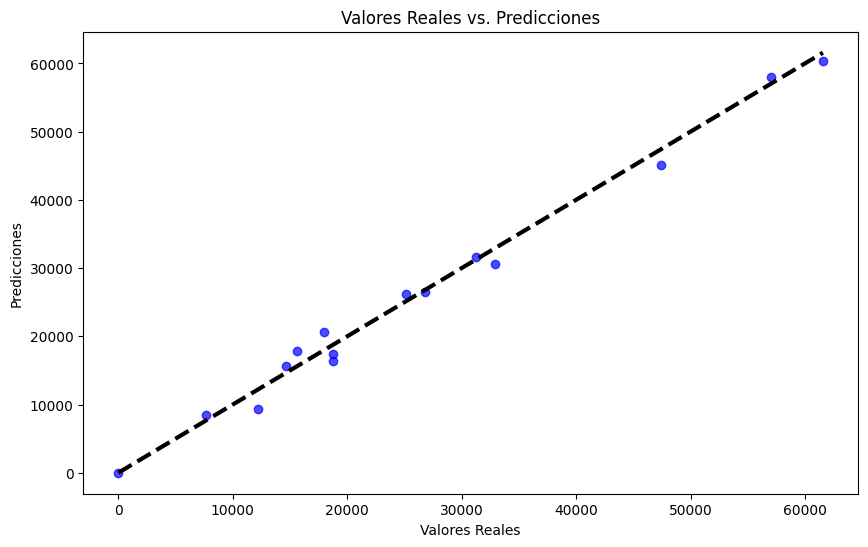

RMSE: 1695.672556
R^2: 0.990131


In [193]:
import matplotlib.pyplot as plt
# Graficar las predicciones frente a los valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')  # puntos predichos
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)  # una línea que representa la predicción perfecta
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Valores Reales vs. Predicciones')
plt.show()
# Calcular y mostrar el error cuadrático medio
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE: %f" % (rmse))

# Calcular el coeficiente de determinación R^2
r2 = r2_score(y_test, y_pred)
print("R^2: %f" % (r2))

# Si necesitas hacer una predicción con un nuevo conjunto de datos:
# y_pred_new = xg_reg.predict(X_new)


Veamos si realmente no hay variables obvias que hacen que el modelo sea tan bueno...

#Explainable artificial intelligence Modelo F143


[20:24:48] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


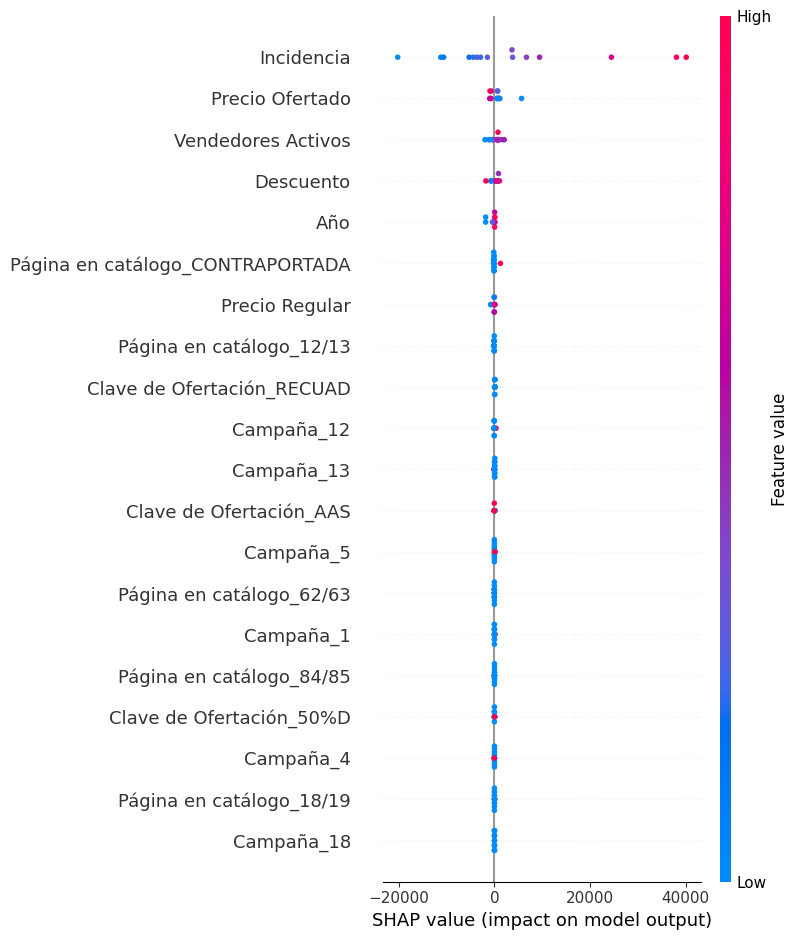

In [194]:
import shap
# Usar TreeExplainer específico para modelos basados en árboles
explainer = shap.TreeExplainer(xg_reg)

# Calcular los SHAP values para el conjunto de prueba
shap_values = explainer.shap_values(X_test, check_additivity=False)
shap.summary_plot(shap_values, X_test, feature_names=X_F143.columns)

**Ahora con todos los registros**

[20:24:49] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


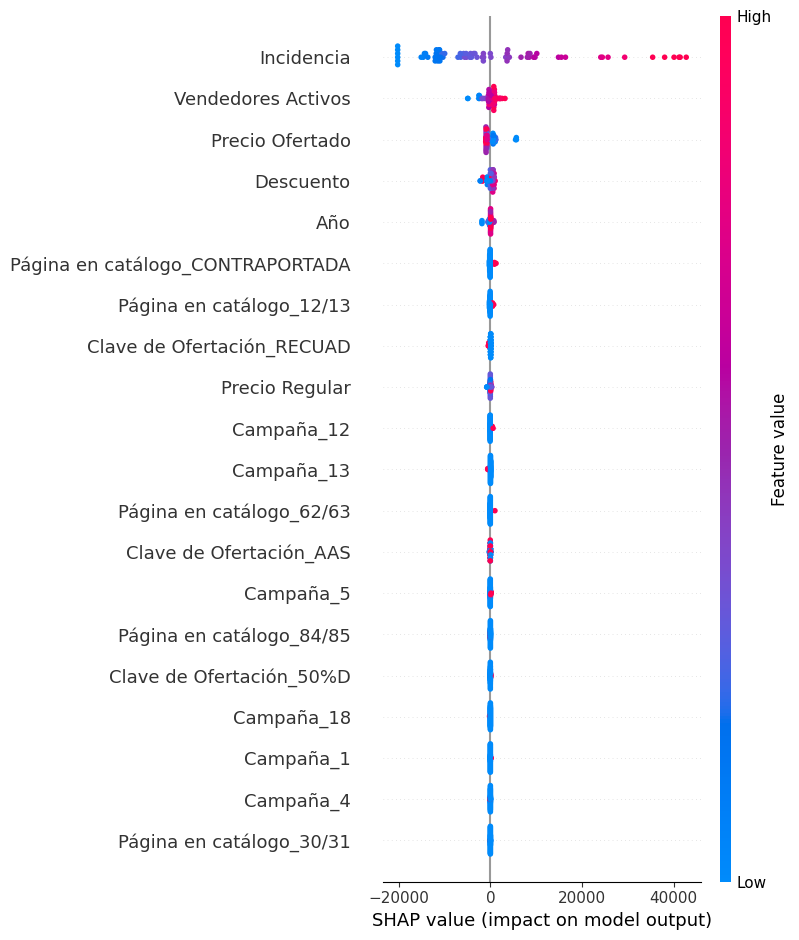

In [195]:
import shap

# Usar TreeExplainer específico para modelos basados en árboles
explainer = shap.TreeExplainer(xg_reg)

# Calcular los SHAP values para el conjunto de prueba
shap_values = explainer.shap_values(X_F143.values, check_additivity=False)
shap.summary_plot(shap_values, X_F143.values, feature_names=X_F143.columns)
#la escala no permite ver bien las otras variables..pero tienen peso... en las
#gráficas de dependencia podemos verlo con mas claridad

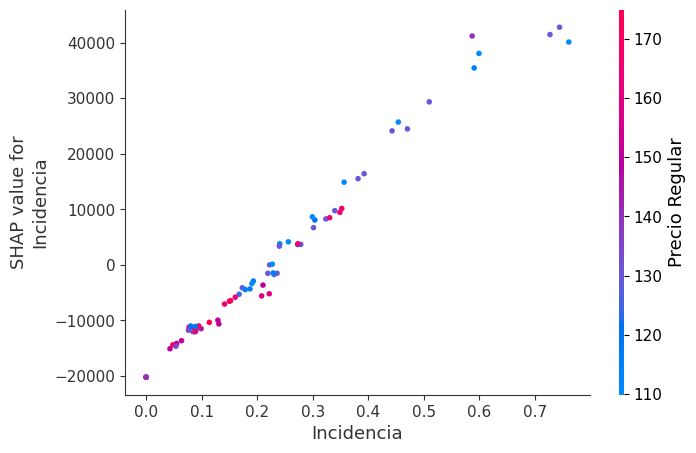

In [196]:
shap.dependence_plot('Incidencia', shap_values, X_F143, interaction_index='Precio Regular')
#shap.dependence_plot('Vendedores Activos', shap_values, X_F143, interaction_index='Incidencia')

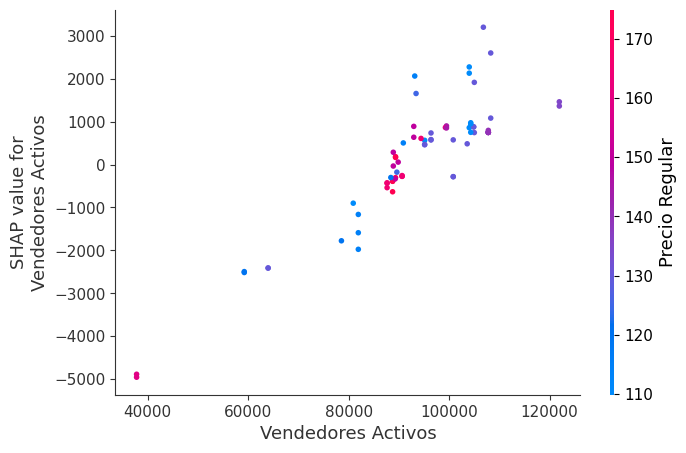

In [197]:
shap.dependence_plot('Vendedores Activos', shap_values, X_F143, interaction_index='Precio Regular')
#shap.dependence_plot('Vendedores Activos', shap_values, X_F143, interaction_index='Incidencia')

#AUNQUE EL MODELO ES BASTANTE BUENO PARA CALCULAR O PREDECIR Incidencia es una variable

El gráfico SHAP (SHapley Additive exPlanations) que has mostrado es un diagrama de dependencia que intenta explicar el efecto de una única característica (en este caso, "Incidencia") en la predicción de un modelo de regresión. Los valores SHAP representan cuánto impacta cada característica en la diferencia entre la predicción y el valor base (la media de las predicciones sobre el conjunto de datos).

En tu gráfico, en el eje x se muestra la característica "Incidencia", que parece ser una tasa o proporción, y en el eje y, los valores SHAP correspondientes a "Incidencia". Los puntos están codificados por colores según el "Precio Ofertado", lo que significa que el color refleja el valor del precio ofertado para cada punto.

La interpretación de este gráfico podría ser la siguiente:

1. **Relación entre Incidencia y el impacto en la predicción**: Parece haber una relación positiva entre la incidencia y su impacto en la predicción de la variable objetivo. Esto es, a medida que la incidencia aumenta, el valor SHAP también tiende a aumentar, lo que indica que una mayor incidencia está asociada con un mayor impacto en el incremento de la predicción del modelo (por ejemplo, más unidades vendidas o una mayor probabilidad de venta, dependiendo de lo que el modelo esté prediciendo).

2. **Variabilidad por el Precio Ofertado**: Los puntos de diferentes colores pueden indicar que para diferentes niveles de "Precio Ofertado", el efecto de la "Incidencia" en la predicción cambia. Si los puntos con colores más cálidos (como el rojo) indican precios más altos, podrías interpretar que para productos con un mayor precio ofertado, el efecto de la incidencia en las predicciones es diferente en comparación con aquellos con precios más bajos.

3. **Concentración de puntos**: Hay una concentración de puntos alrededor de valores bajos de incidencia, lo que sugiere que para la mayoría de las observaciones, la incidencia es baja. Además, esta concentración de puntos tiene una amplia gama de valores SHAP, lo que implica que para incidencias similares puede haber un impacto variado en la predicción.

Para interpretar adecuadamente el gráfico y obtener conclusiones significativas, sería esencial entender completamente:

- **La métrica de "Incidencia"**: ¿Qué significa exactamente en el contexto de tu modelo y cómo se calcula?
- **La variable de salida del modelo**: ¿Estás prediciendo ventas, probabilidad de compra, o alguna otra métrica?
- **Distribución de "Precio Ofertado"**: ¿Cómo se distribuye esta variable y cómo afecta a la predicción?

Además, al interpretar los valores SHAP y los diagramas de dependencia, es importante recordar que estamos hablando de correlaciones modeladas, no necesariamente de causalidad. Las conclusiones deben considerarse junto con el conocimiento del dominio y, si es posible, validarse con experimentos controlados o recopilación de más datos.

In [103]:
shap_umap = pd.DataFrame(shap_values,columns=X_F143.columns)
shap_umap

Año  Precio Regular  Precio Ofertado   Descuento    Incidencia  \
0  -1840.869141     -763.783508      1054.174927  844.937012  40095.835938   
1   -180.327316      -68.243118       597.874084  541.461304  14869.050781   
2   -466.513885      -68.222717       562.641968  294.666840  25686.980469   
3    -52.884041      -68.175499       740.001343  830.017700   8645.695312   
4    -46.098358      -68.153923       651.210876  538.907837   3797.233643   
..          ...             ...              ...         ...           ...   
66    56.979671       66.035378      -784.029114  527.924927 -12047.251953   
67    95.233810      193.363281      -758.158386  602.444092 -10349.122070   
68    74.182922       52.396851      -992.254333  172.761795 -11473.287109   
69    89.111023      132.724854      -979.695923  193.289291 -10988.655273   
70    75.464516       39.633137     -1016.496704  162.838455 -14394.392578   

    Vendedores Activos   Campaña_1  Campaña_2  Campaña_3  Campaña_4  ...  \
0          -900.721252  150.530914   0.047602        0.0   3.780006  ...   
1           973.687134   -4.380187   0.053476        0.0 -35.676899  ...   
2           950.386902   -4.380187   0.049862        0.0 -33.755600  ...   
3           750.621704   -4.380187   0.073001        0.0 -70.256233  ...   
4           913.604431   -4.380187   0.044695        0.0 -78.316734  ...   
..                 ...         ...        ...        ...        ...  ...   
66          165.026627   -8.313341   0.082127        0.0   3.136303  ...   
67          183.260681   -2.885085   0.082127        0.0   3.136303  ...   
68         -390.707672   -5.407041   0.098026        0.0   3.935447  ...   
69         -385.840149   -2.855262   0.098026        0.0   3.935447  ...   
70         -634.531921   -2.855225   0.085752        0.0   3.916435  ...   

    Clave de Ofertación_ND  Clave de Ofertación_NR  Clave de Ofertación_NVCO  \
0                      0.0                     0.0                       0.0   
1                      0.0                     0.0                       0.0   
2                      0.0                     0.0                       0.0   
3                      0.0                     0.0                       0.0   
4                      0.0                     0.0                       0.0   
..                     ...                     ...                       ...   
66                     0.0                     0.0                       0.0   
67                     0.0                     0.0                       0.0   
68                     0.0                     0.0                       0.0   
69                     0.0                     0.0                       0.0   
70                     0.0                     0.0                       0.0   

    Clave de Ofertación_NVO  Clave de Ofertación_NVOPQ  \
0                       0.0                        0.0   
1                       0.0                        0.0   
2                       0.0                        0.0   
3                       0.0                        0.0   
4                       0.0                        0.0   
..                      ...                        ...   
66                      0.0                        0.0   
67                      0.0                        0.0   
68                      0.0                        0.0   
69                      0.0                        0.0   
70                      0.0                        0.0   

    Clave de Ofertación_PQ  Clave de Ofertación_PQ20%  \
0                      0.0                        0.0   
1                      0.0                        0.0   
2                      0.0                        0.0   
3                      0.0                        0.0   
4                      0.0                        0.0   
..                     ...                        ...   
66                     0.0                        0.0   
67                     0.0                      

In [109]:
X_F143.reset_index()

index   Año  Precio Regular  Precio Ofertado  Descuento  Incidencia  \
0      39  2019           109.9             59.9   0.454959    0.760882   
1     384  2019           109.9             59.9   0.454959    0.356414   
2     385  2019           109.9             59.9   0.454959    0.453995   
3     386  2019           109.9             59.9   0.454959    0.299234   
4     387  2019           109.9             59.9   0.454959    0.240626   
..    ...   ...             ...              ...        ...         ...   
66   9121  2023           174.9             89.9   0.485992    0.088623   
67   9122  2023           174.9             89.9   0.485992    0.113821   
68   9286  2023           174.9             99.9   0.428816    0.088409   
69   9287  2023           174.9             99.9   0.428816    0.094764   
70   9288  2023           174.9             99.9   0.428816    0.048204   

    Vendedores Activos  Campaña_1  Campaña_2  Campaña_3  ...  \
0                80914          1          0          0  ...   
1               104303          0          0          0  ...   
2               104303          0          0          0  ...   
3               104303          0          0          0  ...   
4               104303          0          0          0  ...   
..                 ...        ...        ...        ...  ...   
66               89333          0          0          0  ...   
67               89333          0          0          0  ...   
68               88747          0          0          0  ...   
69               88747          0          0          0  ...   
70               88747          0          0          0  ...   

    Clave de Ofertación_ND  Clave de Ofertación_NR  Clave de Ofertación_NVCO  \
0                        0                       0                         0   
1                        0                       0                         0   
2                        0                       0                         0   
3                        0                       0                         0   
4                        0                       0                         0   
..                     ...                     ...                       ...   
66                       0                       0                         0   
67                       0                       0                         0   
68                       0                       0                         0   
69                       0                       0                         0   
70                       0                       0                         0   

    Clave de Ofertación_NVO  Clave de Ofertación_NVOPQ  \
0                         0                          0   
1                         0                          0   
2                         0                          0   
3                         0                          0   
4                         0                          0   
..                      ...                        ...   
66                        0                          0   
67                        0                          0   
68                        0                          0   
69                        0                          0   
70                        0                          0   

    Clave de Ofertación_PQ  Clave de Ofertación_PQ20%  \
0                        0                          0   
1                        0                          0   
2                        0                          0   
3                        0                          0   
4                        0                          0   
..                     ...                        ...   
66                       0                          0   
67                       0                          0   
68                       0                          0   
69                       0                          0   
70                       0                       

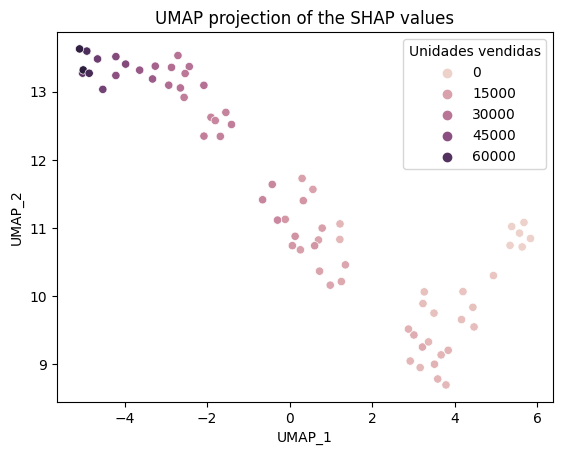

In [117]:
import umap
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
# Ajusta UMAP a tus datos para reducir la dimensionalidad
reducer = umap.UMAP(n_neighbors=30,metric='euclidean')
embedding = reducer.fit_transform(shap_umap)

# Convierte el embedding en un DataFrame de pandas para la visualización
embedding_df = pd.DataFrame(embedding, columns=['UMAP_1', 'UMAP_2'])

# Ahora usa Seaborn para visualizar
sns.scatterplot(data=embedding_df, x='UMAP_1', y='UMAP_2',hue=dataset_onehot[dataset_onehot['Clave de SKU'] == 'F143'].reset_index()['Unidades vendidas'])
plt.title('UMAP projection of the SHAP values')
plt.show()


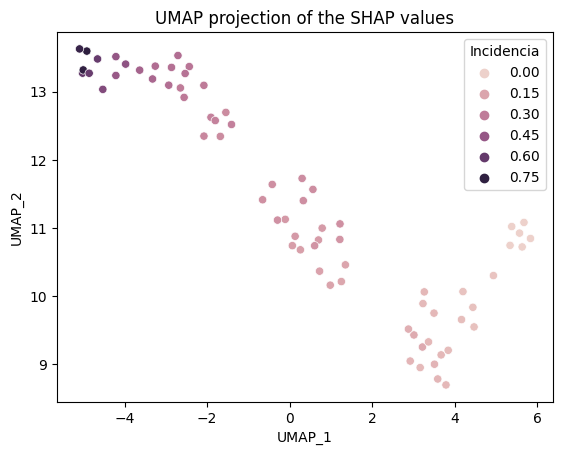

In [118]:
# Ahora usa Seaborn para visualizar
sns.scatterplot(data=embedding_df, x='UMAP_1', y='UMAP_2',hue=dataset_onehot[dataset_onehot['Clave de SKU'] == 'F143'].reset_index()['Incidencia'])
plt.title('UMAP projection of the SHAP values')
plt.show()


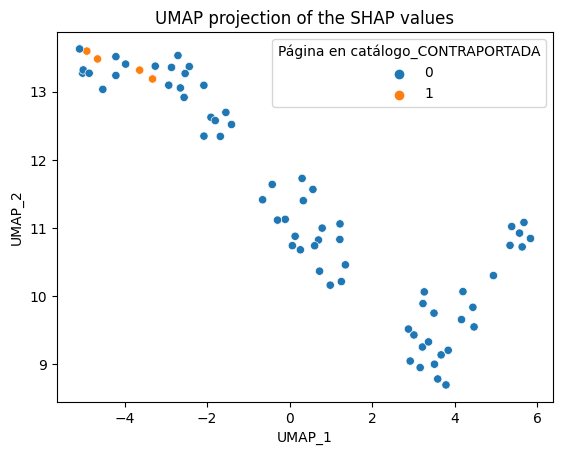

In [120]:
# Ahora usa Seaborn para visualizar
sns.scatterplot(data=embedding_df, x='UMAP_1', y='UMAP_2',hue=dataset_onehot[dataset_onehot['Clave de SKU'] == 'F143'].reset_index()['Página en catálogo_CONTRAPORTADA'])
plt.title('UMAP projection of the SHAP values')
plt.show()

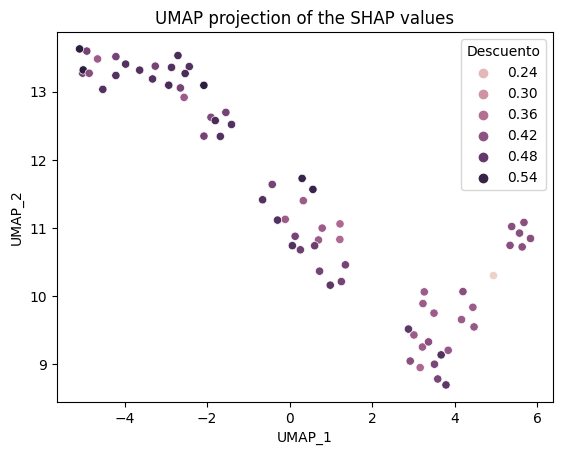

In [119]:
# Ahora usa Seaborn para visualizar
sns.scatterplot(data=embedding_df, x='UMAP_1', y='UMAP_2',hue=dataset_onehot[dataset_onehot['Clave de SKU'] == 'F143'].reset_index()['Descuento'])
plt.title('UMAP projection of the SHAP values')
plt.show()


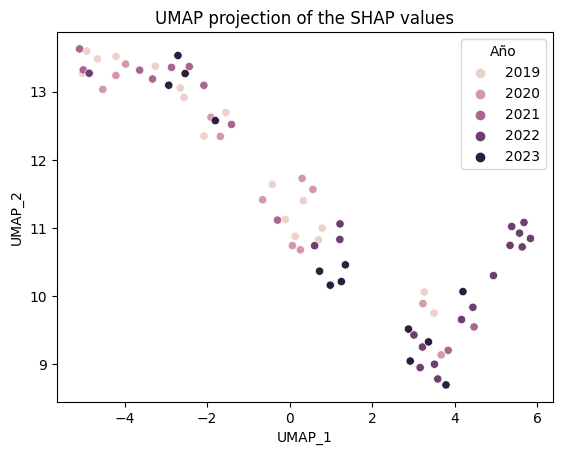

In [140]:
# Ahora usa Seaborn para visualizar
sns.scatterplot(data=embedding_df, x='UMAP_1', y='UMAP_2',hue=dataset_onehot[dataset_onehot['Clave de SKU'] == 'F143'].reset_index()['Año'])
plt.title('UMAP projection of the SHAP values')
plt.show()


#Predicción F143
NO EXISTE EN LOS DATOS APREDECIR... Sólo 64 ya lo sabiamos pero solo queria demostrar

In [134]:
import numpy as np
# Asumiendo que estos son tus dos arrays (o listas):
array1 = val_final['Clave de SKU'].unique()
array2 = sku_total_counts_sorted['Clave de SKU']

# Calcular la intersección de los dos arrays
intersection = np.intersect1d(array1, array2)
print(intersection)
print('SOLO APARECE UNO')


['F64']
SOLO APARECE UNO


#Predicción F64

In [211]:
X_F64 = dataset[dataset['Clave de SKU'] == 'F64']
#por obvias razones quitamos 'Clave de SKU','Unidades vendidas' para el entrenamiento
X_F64 = X_F64.drop(columns=['Clave de SKU','Unidades vendidas'])#,'Incidencia','Precio Ofertado','Año','Descuento'])
X_F64

Año  Precio Regular  Precio Ofertado  Descuento  Incidencia  \
286   2019           334.9            299.9   0.104509    0.156690   
287   2019           334.9            299.9   0.104509    0.167434   
654   2019           334.9            334.9   0.000000    0.061410   
655   2019           334.9            334.9   0.000000    0.014018   
882   2019           334.9            299.9   0.104509    0.172971   
...    ...             ...              ...        ...         ...   
9312  2023           429.9            429.9   0.000000    0.019753   
9313  2023           429.9            429.9   0.000000    0.011922   
9456  2023           429.9            386.9   0.100023    0.048473   
9457  2023           429.9            386.9   0.100023    0.022212   
9594  2023           429.9            386.9   0.100023    0.054760   

      Vendedores Activos  Campaña_1  Campaña_2  Campaña_3  Campaña_4  ...  \
286                92335          0          0          1          0  ...   
287                92335          0          0          1          0  ...   
654               104006          0          0          0          0  ...   
655               104006          0          0          0          0  ...   
882                90391          0          0          0          0  ...   
...                  ...        ...        ...        ...        ...  ...   
9312               88747          0          0          0          0  ...   
9313               88747          0          0          0          0  ...   
9456               77300          0          0          0          0  ...   
9457               77300          0          0          0          0  ...   
9594               80753          0          0          0          0  ...   

      Clave de Ofertación_ND  Clave de Ofertación_NR  \
286                        0                       0   
287                        0                       0   
654                        1                       0   
655                        0                       0   
882                        0                       0   
...                      ...                     ...   
9312                       1                       0   
9313                       0                       0   
9456                       0                       0   
9457                       0                       0   
9594                       0                       0   

      Clave de Ofertación_NVCO  Clave de Ofertación_NVO  \
286                          0                        0   
287                          0                        0   
654                          0                        0   
655                          0                        0   
882                          0                        0   
...                        ...                      ...   
9312                         0                        0   
9313                         0                        0   
9456                         0                        0   
9457                         0                        0   
9594                         0                        0   

      Clave de Ofertación_NVOPQ  Clave de Ofertación_PQ  \
286                           0                       0   
287                           0                       0   
654                           0                       0   
655                           0                       0   
882                           0                       0   
...                         ...                     ...   
9312                          0                       0   
9313                          0                       0   
9456                          0                       0   
9457                          0                       0   
9594                          0                       0   

      Clave de Ofertación_PQ20%  Clave de Ofertación_PQGT  \
286                           0                         0   
287                         

In [212]:
Y_F64= dataset[dataset['Clave de SKU'] == 'F64']['Unidades vendidas']
Y_F64

286     14468.0
287     15460.0
654      6387.0
655      1458.0
882     15635.0
         ...   
9312     1753.0
9313     1058.0
9456     3747.0
9457     1717.0
9594     4422.0
Name: Unidades vendidas, Length: 69, dtype: float64

In [145]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Suponiendo que ya tienes un DataFrame de pandas llamado X_F143 con las características,
# y un DataFrame llamado Y_F143 con la variable objetivo.

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_F64.values, Y_F64, test_size=0.2, random_state=42)

In [230]:
#gridserch la busqueda de los mejores hiperparametros para el modelo
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# Definir un diccionario con los hiperparámetros y los rangos que quieres probar
param_grid = {
    'colsample_bytree': [0.6, 0.7,0.75,0.8],
    'gamma': [0.3,0.4,0,5],
    'learning_rate': [0.1,0.08,0.15],
    'max_depth': [20, 21,22],
    'n_estimators': [200],
    'subsample': [0.6,0.7,0.8]
}

# Instanciar el modelo de XGBoost
xgb_model = XGBRegressor(objective='reg:squarederror')

# Instanciar GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Ajustar GridSearchCV
grid_search.fit(X_train, y_train)

# Los mejores parámetros y mejor modelo
best_parameters = grid_search.best_params_
best_model = grid_search.best_estimator_

# Ver los mejores parámetros
print("Mejores parámetros:", best_parameters)

# Ver el mejor modelo
print("Mejor modelo:", best_model)

Fitting 3 folds for each of 432 candidates, totalling 1296 fits
Mejores parámetros: {'colsample_bytree': 0.75, 'gamma': 0, 'learning_rate': 0.08, 'max_depth': 20, 'n_estimators': 200, 'subsample': 0.8}
Mejor modelo: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.75, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.08, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=20, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)


In [231]:
grid_search.best_params_

{'colsample_bytree': 0.75,
 'gamma': 0,
 'learning_rate': 0.08,
 'max_depth': 20,
 'n_estimators': 200,
 'subsample': 0.8}

In [232]:
# Instanciar el modelo de XGBoost
xg_reg = xgb.XGBRegressor(**grid_search.best_params_)

# Ajustar el modelo a los datos de entrenamiento
xg_reg.fit(X_train, y_train)

# Hacer predicciones en los datos de prueba
y_pred = xg_reg.predict(X_test)


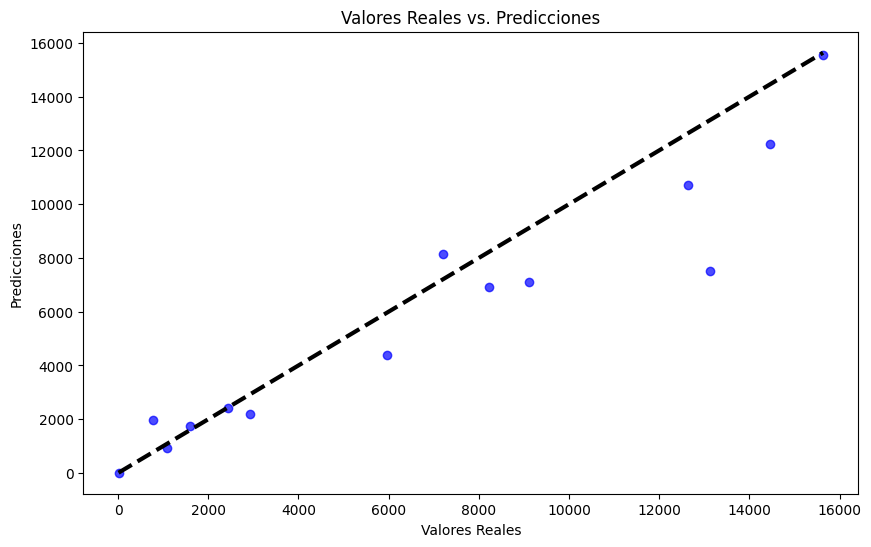

RMSE: 1919.699155
R^2: 0.869471


In [233]:
import matplotlib.pyplot as plt
# Graficar las predicciones frente a los valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')  # puntos predichos
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)  # una línea que representa la predicción perfecta
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Valores Reales vs. Predicciones')
plt.show()
# Calcular y mostrar el error cuadrático medio
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE: %f" % (rmse))

# Calcular el coeficiente de determinación R^2
r2 = r2_score(y_test, y_pred)
print("R^2: %f" % (r2))

# Si necesitas hacer una predicción con un nuevo conjunto de datos:
# y_pred_new = xg_reg.predict(X_new)


#Explainable artificial intelligence Modelo F64

[20:50:00] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


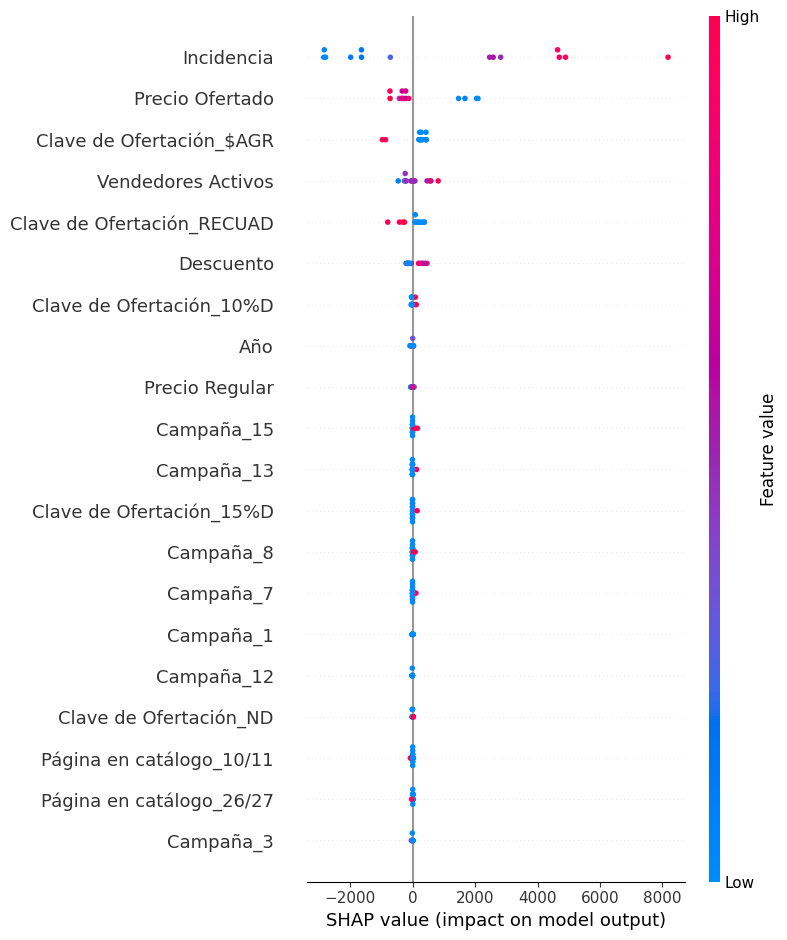

In [234]:
import shap
# Usar TreeExplainer específico para modelos basados en árboles
explainer = shap.TreeExplainer(xg_reg)

# Calcular los SHAP values para el conjunto de prueba
shap_values = explainer.shap_values(X_test, check_additivity=False)
shap.summary_plot(shap_values, X_test, feature_names=X_F64.columns)

[20:50:04] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


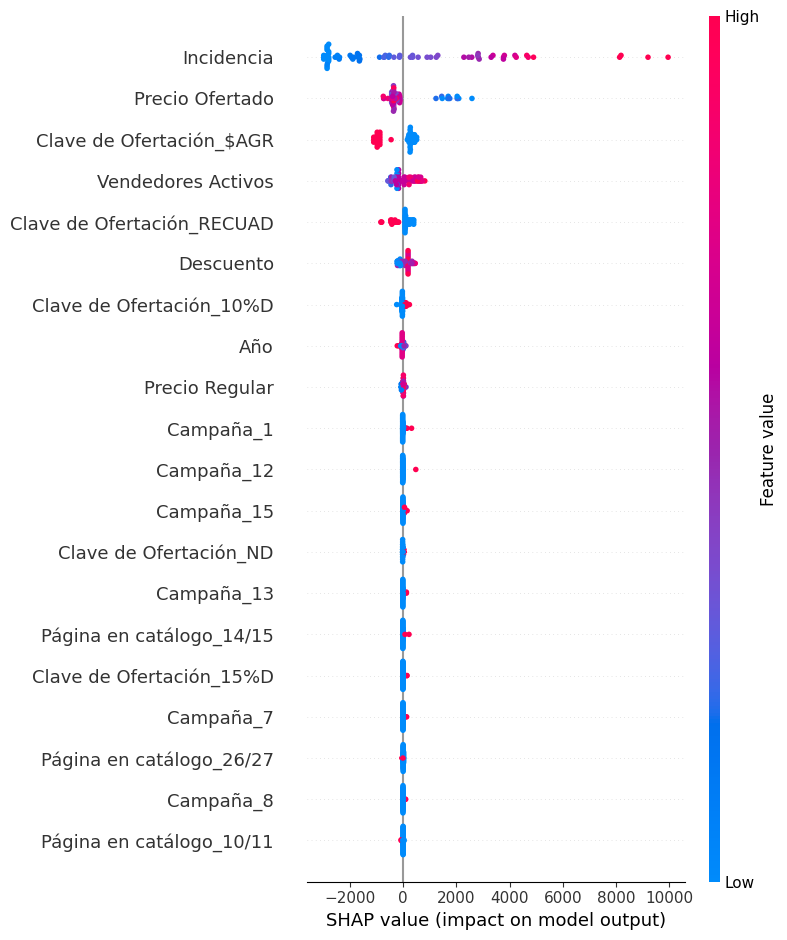

In [235]:
import shap

# Usar TreeExplainer específico para modelos basados en árboles
explainer = shap.TreeExplainer(xg_reg)

# Calcular los SHAP values para el conjunto de prueba
shap_values = explainer.shap_values(X_F64.values, check_additivity=False)
shap.summary_plot(shap_values, X_F64.values, feature_names=X_F64.columns)
#la escala no permite ver bien las otras variables..pero tienen peso... en las
#gráficas de dependencia podemos verlo con mas claridad

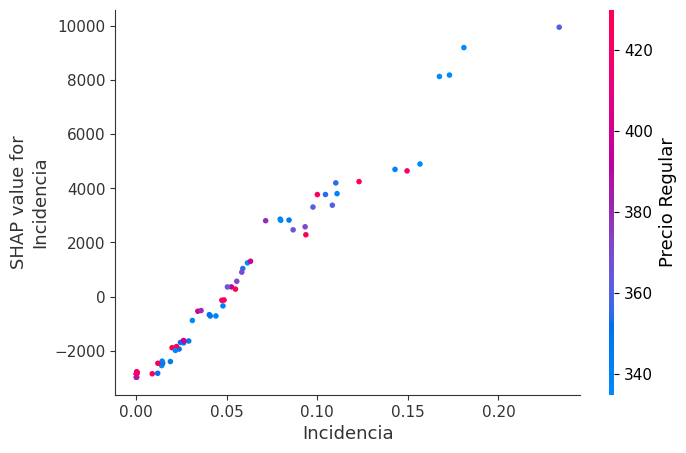

In [236]:
shap.dependence_plot('Incidencia', shap_values, X_F64, interaction_index='Precio Regular')
#shap.dependence_plot('Vendedores Activos', shap_values, X_F143, interaction_index='Incidencia')

#Predicción F64


In [237]:

X_F64 = dataset[dataset['Clave de SKU'] == 'F64']
Y_F64 = X_F64['Unidades vendidas']
print(Y_F64)
#por obvias razones quitamos 'Clave de SKU','Unidades vendidas' para el entrenamiento
X_F64 = X_F64.drop(columns=['Clave de SKU','Unidades vendidas'])#,'Incidencia','Precio Ofertado','Año','Descuento'])
X_F64

286     14468.0
287     15460.0
654      6387.0
655      1458.0
882     15635.0
         ...   
9312     1753.0
9313     1058.0
9456     3747.0
9457     1717.0
9594     4422.0
Name: Unidades vendidas, Length: 69, dtype: float64


Año  Precio Regular  Precio Ofertado  Descuento  Incidencia  \
286   2019           334.9            299.9   0.104509    0.156690   
287   2019           334.9            299.9   0.104509    0.167434   
654   2019           334.9            334.9   0.000000    0.061410   
655   2019           334.9            334.9   0.000000    0.014018   
882   2019           334.9            299.9   0.104509    0.172971   
...    ...             ...              ...        ...         ...   
9312  2023           429.9            429.9   0.000000    0.019753   
9313  2023           429.9            429.9   0.000000    0.011922   
9456  2023           429.9            386.9   0.100023    0.048473   
9457  2023           429.9            386.9   0.100023    0.022212   
9594  2023           429.9            386.9   0.100023    0.054760   

      Vendedores Activos  Campaña_1  Campaña_2  Campaña_3  Campaña_4  ...  \
286                92335          0          0          1          0  ...   
287                92335          0          0          1          0  ...   
654               104006          0          0          0          0  ...   
655               104006          0          0          0          0  ...   
882                90391          0          0          0          0  ...   
...                  ...        ...        ...        ...        ...  ...   
9312               88747          0          0          0          0  ...   
9313               88747          0          0          0          0  ...   
9456               77300          0          0          0          0  ...   
9457               77300          0          0          0          0  ...   
9594               80753          0          0          0          0  ...   

      Clave de Ofertación_ND  Clave de Ofertación_NR  \
286                        0                       0   
287                        0                       0   
654                        1                       0   
655                        0                       0   
882                        0                       0   
...                      ...                     ...   
9312                       1                       0   
9313                       0                       0   
9456                       0                       0   
9457                       0                       0   
9594                       0                       0   

      Clave de Ofertación_NVCO  Clave de Ofertación_NVO  \
286                          0                        0   
287                          0                        0   
654                          0                        0   
655                          0                        0   
882                          0                        0   
...                        ...                      ...   
9312                         0                        0   
9313                         0                        0   
9456                         0                        0   
9457                         0                        0   
9594                         0                        0   

      Clave de Ofertación_NVOPQ  Clave de Ofertación_PQ  \
286                           0                       0   
287                           0                       0   
654                           0                       0   
655                           0                       0   
882                           0                       0   
...                         ...                     ...   
9312                          0                       0   
9313                          0                       0   
9456                          0                       0   
9457                          0                       0   
9594                          0                       0   

      Clave de Ofertación_PQ20%  Clave de Ofertación_PQGT  \
286                           0                         0   
287                         

In [238]:
VAL_F64 = val_final[val_final['Clave de SKU'] == 'F64']
#por obvias razones quitamos 'Clave de SKU','Unidades vendidas' para el entrenamiento
VAL_F64 = VAL_F64.drop(columns=['Clave de SKU','Unidades vendidas'])#,'Incidencia','Precio Ofertado','Año','Descuento'])
VAL_F64

Año  Precio Regular  Precio Ofertado  Descuento  Incidencia  \
9714  2023           429.9            386.9   0.100023         0.0   

      Vendedores Activos  Campaña_1  Campaña_2  Campaña_3  Campaña_4  ...  \
9714               87148          0          0          0          0  ...   

      Clave de Ofertación_ND  Clave de Ofertación_NR  \
9714                       0                       0   

      Clave de Ofertación_NVCO  Clave de Ofertación_NVO  \
9714                         0                        0   

      Clave de Ofertación_NVOPQ  Clave de Ofertación_PQ  \
9714                          0                       0   

      Clave de Ofertación_PQ20%  Clave de Ofertación_PQGT  \
9714                          0                         0   

      Clave de Ofertación_RECUAD  Clave de Ofertación_SSS  
9714                           0                        0  

[1 rows x 145 columns]

In [239]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Suponiendo que ya tienes un DataFrame de pandas llamado X_F143 con las características,
# y un DataFrame llamado Y_F143 con la variable objetivo.

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_F64.values, Y_F64, test_size=0.2, random_state=42)

In [240]:
#gridserch la busqueda de los mejores hiperparametros para el modelo
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# Definir un diccionario con los hiperparámetros y los rangos que quieres probar
param_grid = {
    'colsample_bytree': [0.3, 0.7],
    'gamma': [0, 0.1, 0.3],
    'learning_rate': [0.01, 0.1, 0.5, 1],
    'max_depth': [5, 10, 20, 30,100],
    'n_estimators': [200, 300, 400],
    'subsample': [0.6, 0.8, 1.0]
}

# Instanciar el modelo de XGBoost
xgb_model = XGBRegressor(objective='reg:squarederror')

# Instanciar GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Ajustar GridSearchCV
grid_search.fit(X_train, y_train)

# Los mejores parámetros y mejor modelo
best_parameters = grid_search.best_params_
best_model = grid_search.best_estimator_

# Ver los mejores parámetros
print("Mejores parámetros:", best_parameters)

# Ver el mejor modelo
print("Mejor modelo:", best_model)


Fitting 3 folds for each of 1080 candidates, totalling 3240 fits
Mejores parámetros: {'colsample_bytree': 0.7, 'gamma': 0.3, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'subsample': 1.0}
Mejor modelo: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.3, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)


In [250]:
grid_search.best_params_

{'colsample_bytree': 0.7,
 'gamma': 0.3,
 'learning_rate': 0.1,
 'max_depth': 5,
 'n_estimators': 300,
 'subsample': 1.0}

In [251]:
# Instanciar el modelo de XGBoost
xg_reg = xgb.XGBRegressor(**grid_search.best_params_)

# Ajustar el modelo a los datos de entrenamiento
xg_reg.fit(X_train, y_train)

# Hacer predicciones en los datos de prueba
y_pred = xg_reg.predict(X_test)


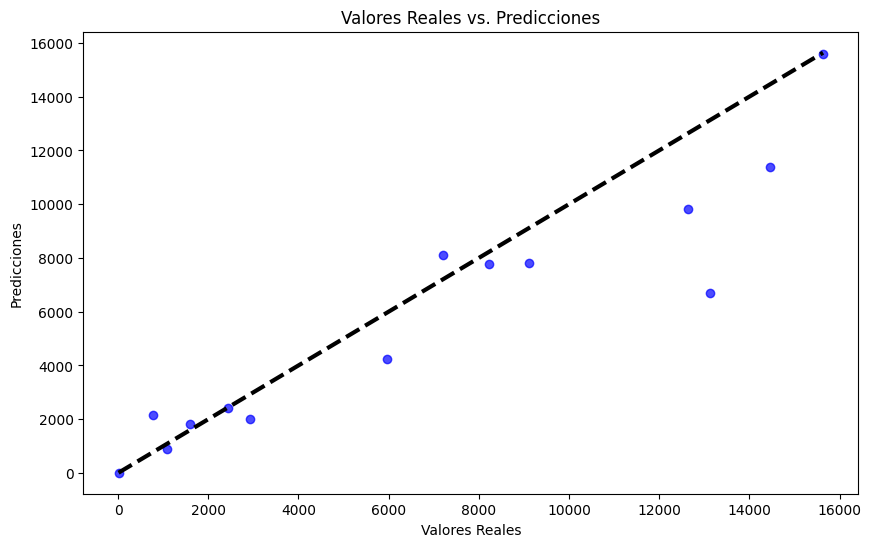

RMSE: 2196.662079
R^2: 0.829090


In [252]:
import matplotlib.pyplot as plt
# Graficar las predicciones frente a los valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')  # puntos predichos
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)  # una línea que representa la predicción perfecta
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Valores Reales vs. Predicciones')
plt.show()
# Calcular y mostrar el error cuadrático medio
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE: %f" % (rmse))

# Calcular el coeficiente de determinación R^2
r2 = r2_score(y_test, y_pred)
print("R^2: %f" % (r2))

# Si necesitas hacer una predicción con un nuevo conjunto de datos:
# y_pred_new = xg_reg.predict(X_new)


#Explainable artificial intelligence Modelo F64

[04:12:54] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


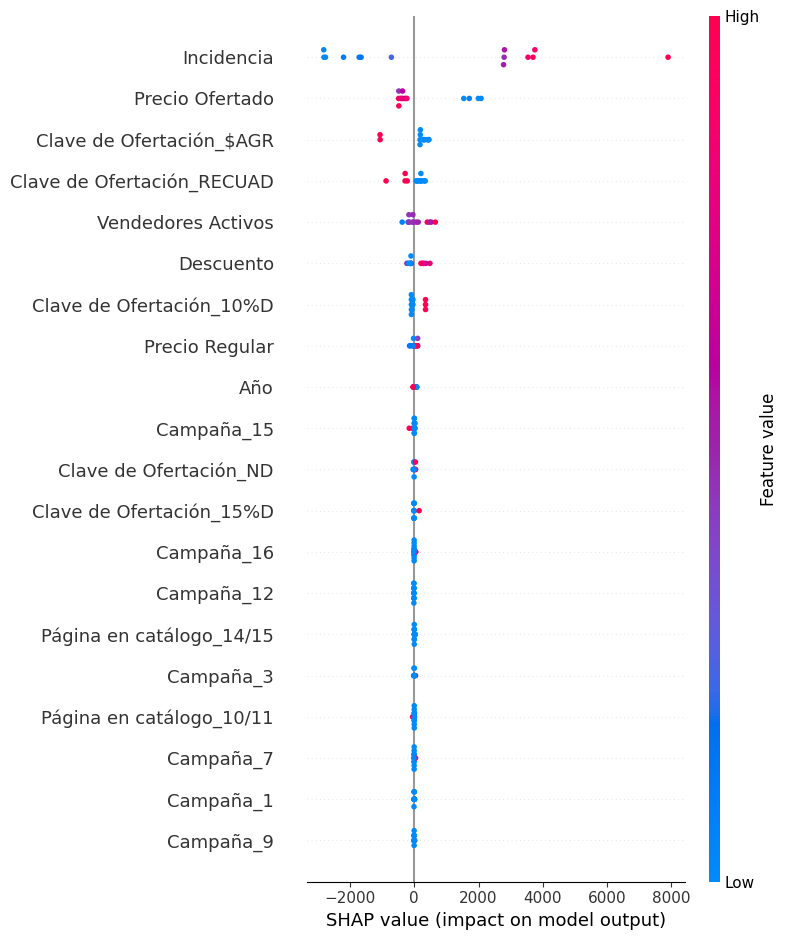

In [253]:
import shap
# Usar TreeExplainer específico para modelos basados en árboles
explainer = shap.TreeExplainer(xg_reg)

# Calcular los SHAP values para el conjunto de prueba
shap_values = explainer.shap_values(X_test, check_additivity=False)
shap.summary_plot(shap_values, X_test, feature_names=X_F64.columns)

[04:12:58] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


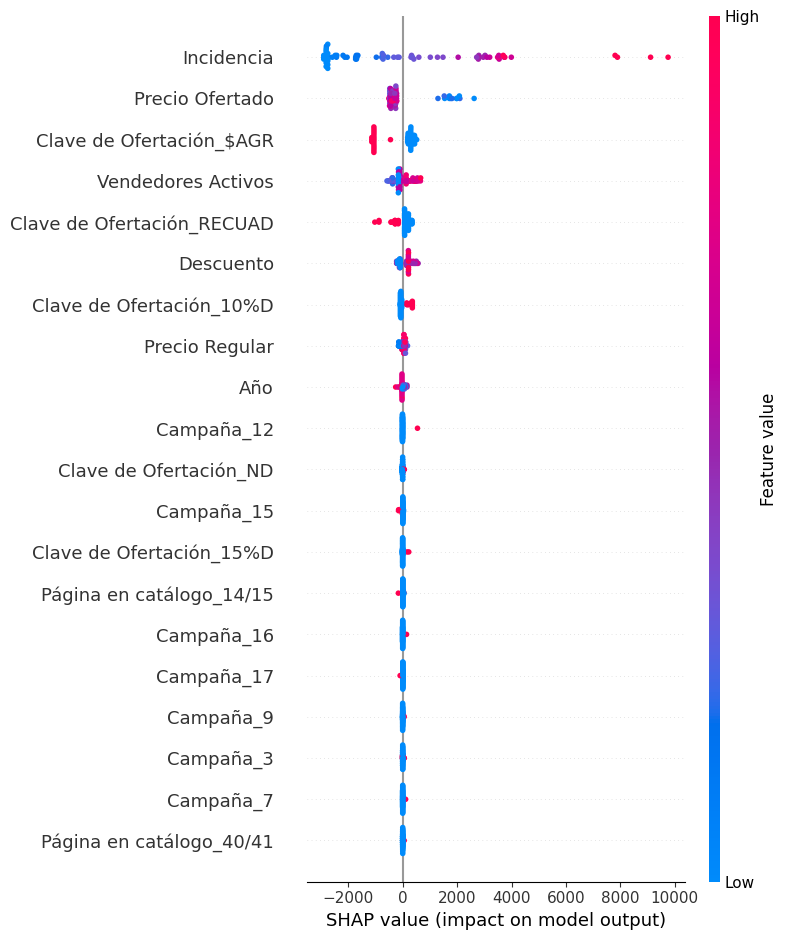

In [254]:
import shap

# Usar TreeExplainer específico para modelos basados en árboles
explainer = shap.TreeExplainer(xg_reg)

# Calcular los SHAP values para el conjunto de prueba
shap_values = explainer.shap_values(X_F64.values, check_additivity=False)
shap.summary_plot(shap_values, X_F64.values, feature_names=X_F64.columns)
#la escala no permite ver bien las otras variables..pero tienen peso... en las
#gráficas de dependencia podemos verlo con mas claridad

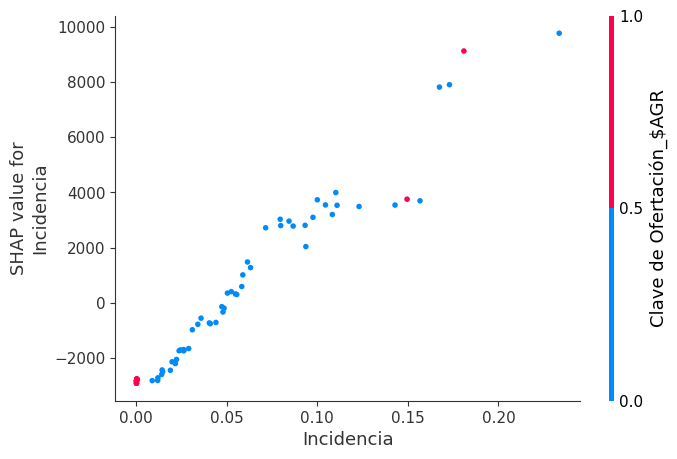

In [255]:
shap.dependence_plot('Incidencia', shap_values, X_F64, interaction_index='Clave de Ofertación_$AGR')

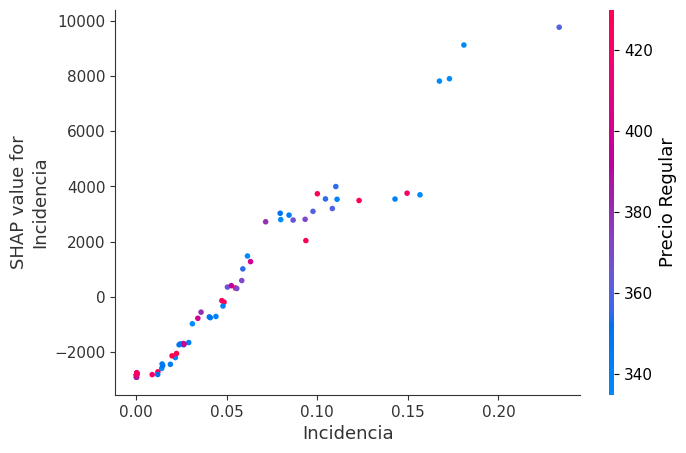

In [247]:
shap.dependence_plot('Incidencia', shap_values, X_F64, interaction_index='Precio Regular')
#shap.dependence_plot('Vendedores Activos', shap_values, X_F143, interaction_index='Incidencia')

In [249]:
# Make predictions
predictions = xg_reg.predict(VAL_F64)
predictions

array([1235.1125], dtype=float32)

In [248]:
VAL_F64

Año  Precio Regular  Precio Ofertado  Descuento  Incidencia  \
9714  2023           429.9            386.9   0.100023         0.0   

      Vendedores Activos  Campaña_1  Campaña_2  Campaña_3  Campaña_4  ...  \
9714               87148          0          0          0          0  ...   

      Clave de Ofertación_ND  Clave de Ofertación_NR  \
9714                       0                       0   

      Clave de Ofertación_NVCO  Clave de Ofertación_NVO  \
9714                         0                        0   

      Clave de Ofertación_NVOPQ  Clave de Ofertación_PQ  \
9714                          0                       0   

      Clave de Ofertación_PQ20%  Clave de Ofertación_PQGT  \
9714                          0                         0   

      Clave de Ofertación_RECUAD  Clave de Ofertación_SSS  
9714                           0                        0  

[1 rows x 145 columns]

In [272]:
dataset

Año Clave de SKU  Precio Regular  Precio Ofertado  Descuento  \
0     2019          A01           105.9            105.9   0.000000   
1     2019          A02           116.9            116.9   0.000000   
2     2019          A03           123.9            123.9   0.000000   
3     2019          A04           136.9            136.9   0.000000   
4     2019         A133           483.6            239.9   0.503929   
...    ...          ...             ...              ...        ...   
9695  2023         U947           159.9            119.9   0.250156   
9696  2023        W1190            59.9             39.9   0.333890   
9697  2023        W1190            59.9             39.9   0.333890   
9698  2023        Y1103           329.8            199.9   0.393875   
9699  2023        Y1103           329.8            199.9   0.393875   

      Unidades vendidas  Incidencia  Vendedores Activos  Campaña_1  Campaña_2  \
0                 127.0    0.001570               80914          1          0   
1                 209.0    0.002583               80914          1          0   
2                 314.0    0.003881               80914          1          0   
3                 352.0    0.004350               80914          1          0   
4               17327.0    0.214141               80914          1          0   
...                 ...         ...                 ...        ...        ...   
9695             2328.0    0.028829               80753          0          0   
9696             8137.0    0.100764               80753          0          0   
9697             7682.0    0.095130               80753          0          0   
9698            30797.0    0.381373               80753          0          0   
9699            37761.0    0.467611               80753          0          0   

      ...  Clave de Ofertación_ND  Clave de Ofertación_NR  \
0     ...                       1                       0   
1     ...                       1                       0   
2     ...                       1                       0   
3     ...                       1                       0   
4     ...                       0                       0   
...   ...                     ...                     ...   
9695  ...                       0                       0   
9696  ...                       0                       0   
9697  ...                       0                       0   
9698  ...                       0                       0   
9699  ...                       0                       0   

      Clave de Ofertación_NVCO  Clave de Ofertación_NVO  \
0                            0                        0   
1                            0                        0   
2                            0                        0   
3                            0                        0   
4                            0                        0   
...                        ...                      ...   
9695                         0                        0   
9696                         0                        0   
9697                         0                        0   
9698                         0                        0   
9699                         0                        0   

      Clave de Ofertación_NVOPQ  Clave de Ofertación_PQ  \
0                             0                       0   
1                             0                       0   
2                             0                       0   
3                             0                       0   
4                             0                       1   
...                         ...                     ...   
9695                          0                       0   
9696                          0                       0   
9697                          0                       0   
9698                          0                       1   
9699                          0                       1   

      Clave de Ofertación_PQ20

In [270]:
X_F64

Año  Precio Regular  Precio Ofertado  Descuento  Incidencia  \
286   2019           334.9            299.9   0.104509    0.156690   
287   2019           334.9            299.9   0.104509    0.167434   
654   2019           334.9            334.9   0.000000    0.061410   
655   2019           334.9            334.9   0.000000    0.014018   
882   2019           334.9            299.9   0.104509    0.172971   
...    ...             ...              ...        ...         ...   
9312  2023           429.9            429.9   0.000000    0.019753   
9313  2023           429.9            429.9   0.000000    0.011922   
9456  2023           429.9            386.9   0.100023    0.048473   
9457  2023           429.9            386.9   0.100023    0.022212   
9594  2023           429.9            386.9   0.100023    0.054760   

      Vendedores Activos  Campaña_1  Campaña_2  Campaña_3  Campaña_4  ...  \
286                92335          0          0          1          0  ...   
287                92335          0          0          1          0  ...   
654               104006          0          0          0          0  ...   
655               104006          0          0          0          0  ...   
882                90391          0          0          0          0  ...   
...                  ...        ...        ...        ...        ...  ...   
9312               88747          0          0          0          0  ...   
9313               88747          0          0          0          0  ...   
9456               77300          0          0          0          0  ...   
9457               77300          0          0          0          0  ...   
9594               80753          0          0          0          0  ...   

      Clave de Ofertación_ND  Clave de Ofertación_NR  \
286                        0                       0   
287                        0                       0   
654                        1                       0   
655                        0                       0   
882                        0                       0   
...                      ...                     ...   
9312                       1                       0   
9313                       0                       0   
9456                       0                       0   
9457                       0                       0   
9594                       0                       0   

      Clave de Ofertación_NVCO  Clave de Ofertación_NVO  \
286                          0                        0   
287                          0                        0   
654                          0                        0   
655                          0                        0   
882                          0                        0   
...                        ...                      ...   
9312                         0                        0   
9313                         0                        0   
9456                         0                        0   
9457                         0                        0   
9594                         0                        0   

      Clave de Ofertación_NVOPQ  Clave de Ofertación_PQ  \
286                           0                       0   
287                           0                       0   
654                           0                       0   
655                           0                       0   
882                           0                       0   
...                         ...                     ...   
9312                          0                       0   
9313                          0                       0   
9456                          0                       0   
9457                          0                       0   
9594                          0                       0   

      Clave de Ofertación_PQ20%  Clave de Ofertación_PQGT  \
286                           0                         0   
287                         

In [280]:
dataset.iloc[X_F64.index]['Unidades vendidas']

286     14468.0
287     15460.0
654      6387.0
655      1458.0
882     15635.0
         ...   
9313     1058.0
9314      999.0
9457     1717.0
9458     1213.0
9595      174.0
Name: Unidades vendidas, Length: 69, dtype: float64

Boolean Series key will be reindexed to match DataFrame index.


Empty DataFrame
Columns: [Año, Precio Regular, Precio Ofertado, Descuento, Incidencia, Vendedores Activos, Campaña_1, Campaña_2, Campaña_3, Campaña_4, Campaña_5, Campaña_6, Campaña_7, Campaña_8, Campaña_9, Campaña_10, Campaña_11, Campaña_12, Campaña_13, Campaña_14, Campaña_15, Campaña_16, Campaña_17, Campaña_18, Campaña_19, Categoría_A, Categoría_B, Categoría_C, Categoría_D, Categoría_E, Categoría_F, Categoría_G, Categoría_H, Categoría_HK, Categoría_I, Categoría_J, Categoría_K, Categoría_M, Categoría_MN, Categoría_MS, Categoría_N, Categoría_P, Categoría_PP, Categoría_R, Categoría_RG, Categoría_S, Categoría_SN, Categoría_SP, Categoría_T, Categoría_U, Categoría_W, Categoría_Y, Página en catálogo_00/01, Página en catálogo_02/03, Página en catálogo_04/05, Página en catálogo_06/07, Página en catálogo_08/09, Página en catálogo_10/11, Página en catálogo_100/101, Página en catálogo_102/103, Página en catálogo_104/105, Página en catálogo_106/107, Página en catálogo_108/109, Página en catálogo_110/111, Página en catálogo_112/113, Página en catálogo_114/115, Página en catálogo_118/119, Página en catálogo_12/13, Página en catálogo_120/121, Página en catálogo_14/15, Página en catálogo_16/17, Página en catálogo_18/19, Página en catálogo_20/21, Página en catálogo_22/23, Página en catálogo_24/25, Página en catálogo_26/27, Página en catálogo_28/29, Página en catálogo_30/31, Página en catálogo_32/33, Página en catálogo_34/35, Página en catálogo_36/37, Página en catálogo_38/39, Página en catálogo_40/41, Página en catálogo_42/43, Página en catálogo_44/45, Página en catálogo_46/47, Página en catálogo_48/49, Página en catálogo_50/51, Página en catálogo_52/53, Página en catálogo_54/55, Página en catálogo_56/57, Página en catálogo_58/59, Página en catálogo_60/61, Página en catálogo_62/63, Página en catálogo_64/65, Página en catálogo_66/67, Página en catálogo_68/69, Página en catálogo_70/71, Página en catálogo_72/73, Página en catálogo_74/75, ...]
Index: []

[0 rows x 145 columns]

In [268]:
shap_values.shape

(69, 145)

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.


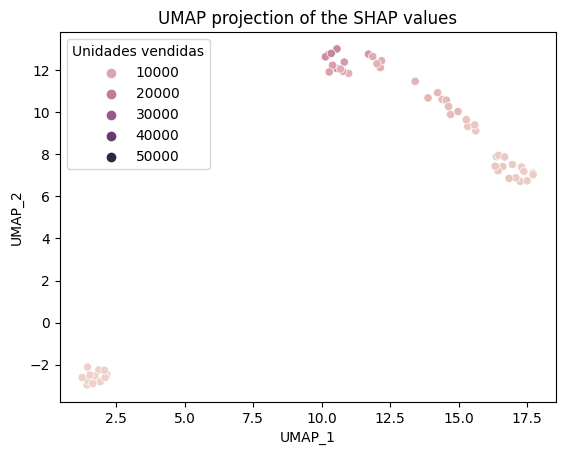

In [289]:
import umap
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
# Ajusta UMAP a tus datos para reducir la dimensionalidad
reducer = umap.UMAP(n_neighbors=15,metric='euclidean',min_dist=0.1,random_state=1)
embedding = reducer.fit_transform(shap_values)

# Convierte el embedding en un DataFrame de pandas para la visualización
embedding_df = pd.DataFrame(embedding, columns=['UMAP_1', 'UMAP_2'],index=X_F64.index)

# Ahora usa Seaborn para visualizar
sns.scatterplot(data=embedding_df, x='UMAP_1', y='UMAP_2',hue=dataset.iloc[X_F64.index]['Unidades vendidas'])
plt.title('UMAP projection of the SHAP values')
plt.show()


n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.


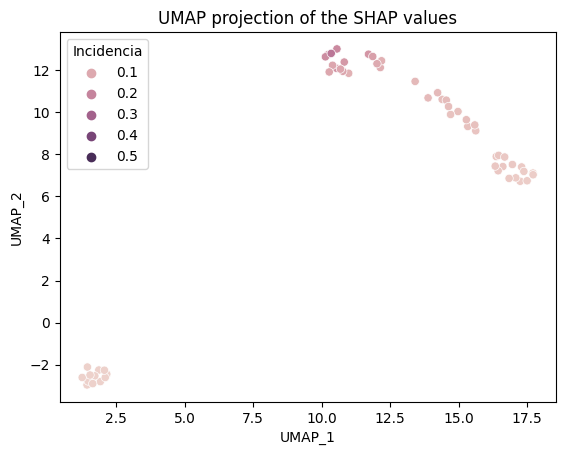

In [290]:
import umap
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
# Ajusta UMAP a tus datos para reducir la dimensionalidad
reducer = umap.UMAP(n_neighbors=15,metric='euclidean',min_dist=0.1,random_state=1)
embedding = reducer.fit_transform(shap_values)

# Convierte el embedding en un DataFrame de pandas para la visualización
embedding_df = pd.DataFrame(embedding, columns=['UMAP_1', 'UMAP_2'],index=X_F64.index)

# Ahora usa Seaborn para visualizar
sns.scatterplot(data=embedding_df, x='UMAP_1', y='UMAP_2',hue=dataset.iloc[X_F64.index]['Incidencia'])
plt.title('UMAP projection of the SHAP values')
plt.show()


n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.


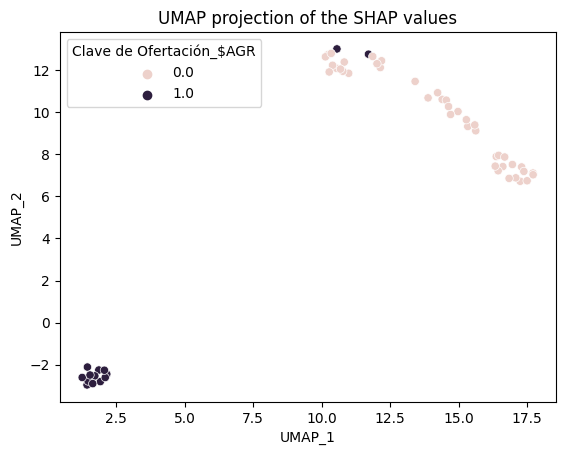

In [291]:
import umap
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
# Ajusta UMAP a tus datos para reducir la dimensionalidad
reducer = umap.UMAP(n_neighbors=15,metric='euclidean',min_dist=0.1,random_state=1)
embedding = reducer.fit_transform(shap_values)

# Convierte el embedding en un DataFrame de pandas para la visualización
embedding_df = pd.DataFrame(embedding, columns=['UMAP_1', 'UMAP_2'],index=X_F64.index)

# Ahora usa Seaborn para visualizar
sns.scatterplot(data=embedding_df, x='UMAP_1', y='UMAP_2',hue=dataset.iloc[X_F64.index]['Clave de Ofertación_$AGR'])
plt.title('UMAP projection of the SHAP values')
plt.show()


n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.


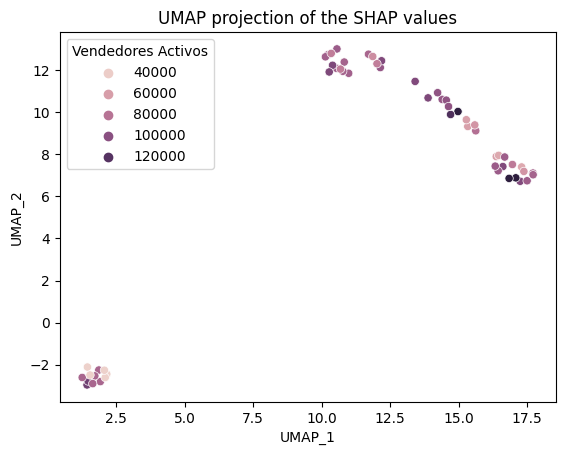

In [292]:
import umap
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
# Ajusta UMAP a tus datos para reducir la dimensionalidad
reducer = umap.UMAP(n_neighbors=15,metric='euclidean',min_dist=0.1,random_state=1)
embedding = reducer.fit_transform(shap_values)

# Convierte el embedding en un DataFrame de pandas para la visualización
embedding_df = pd.DataFrame(embedding, columns=['UMAP_1', 'UMAP_2'],index=X_F64.index)

# Ahora usa Seaborn para visualizar
sns.scatterplot(data=embedding_df, x='UMAP_1', y='UMAP_2',hue=dataset.iloc[X_F64.index]['Vendedores Activos'])
plt.title('UMAP projection of the SHAP values')
plt.show()

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.


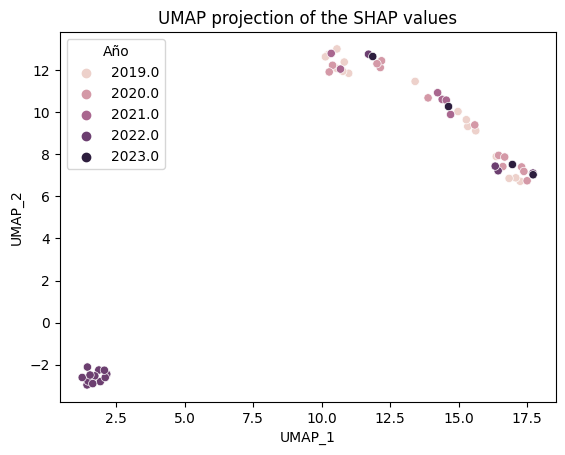

In [293]:
import umap
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
# Ajusta UMAP a tus datos para reducir la dimensionalidad
reducer = umap.UMAP(n_neighbors=15,metric='euclidean',min_dist=0.1,random_state=1)
embedding = reducer.fit_transform(shap_values)

# Convierte el embedding en un DataFrame de pandas para la visualización
embedding_df = pd.DataFrame(embedding, columns=['UMAP_1', 'UMAP_2'],index=X_F64.index)

# Ahora usa Seaborn para visualizar
sns.scatterplot(data=embedding_df, x='UMAP_1', y='UMAP_2',hue=dataset.iloc[X_F64.index]['Año'])
plt.title('UMAP projection of the SHAP values')
plt.show()

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.


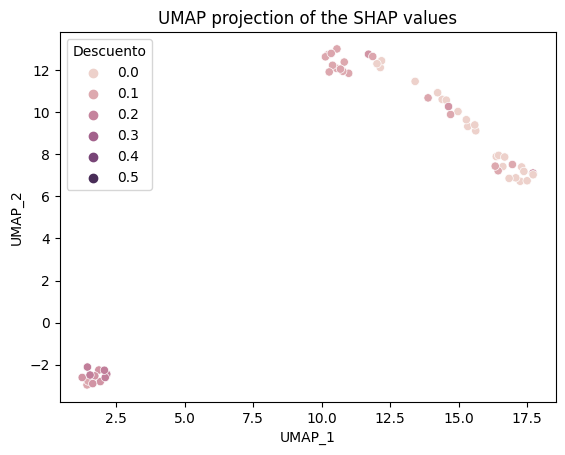

In [302]:
import umap
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
# Ajusta UMAP a tus datos para reducir la dimensionalidad
reducer = umap.UMAP(n_neighbors=15,metric='euclidean',min_dist=0.1,random_state=1)
embedding = reducer.fit_transform(shap_values)

# Convierte el embedding en un DataFrame de pandas para la visualización
embedding_df = pd.DataFrame(embedding, columns=['UMAP_1', 'UMAP_2'],index=X_F64.index)

# Ahora usa Seaborn para visualizar
sns.scatterplot(data=embedding_df, x='UMAP_1', y='UMAP_2',hue=dataset.iloc[X_F64.index]['Descuento'])
plt.title('UMAP projection of the SHAP values')
plt.show()

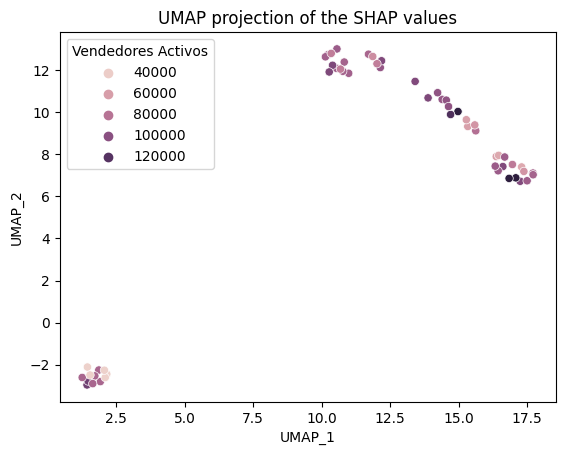

In [303]:
# Ahora usa Seaborn para visualizar
sns.scatterplot(data=embedding_df, x='UMAP_1', y='UMAP_2',hue=dataset.iloc[X_F64.index]['Vendedores Activos'])
plt.title('UMAP projection of the SHAP values')
plt.show()

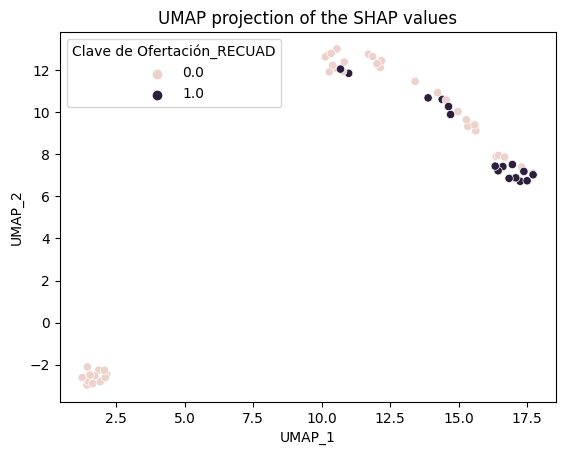

In [304]:
# Ahora usa Seaborn para visualizar
sns.scatterplot(data=embedding_df, x='UMAP_1', y='UMAP_2',hue=dataset.iloc[X_F64.index]['Clave de Ofertación_RECUAD'])
plt.title('UMAP projection of the SHAP values')
plt.show()

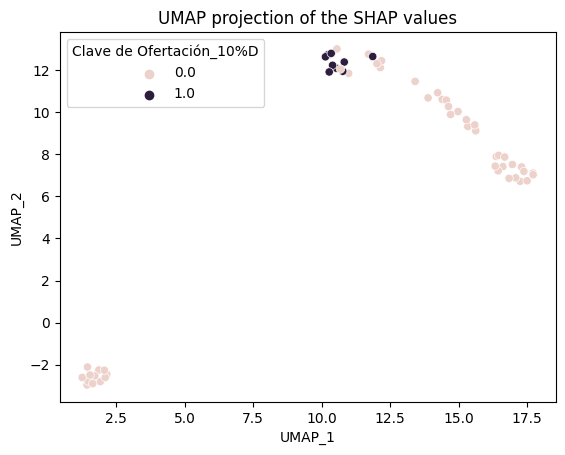

In [306]:
# Ahora usa Seaborn para visualizar
sns.scatterplot(data=embedding_df, x='UMAP_1', y='UMAP_2',hue=dataset.iloc[X_F64.index]['Clave de Ofertación_10%D'])
plt.title('UMAP projection of the SHAP values')
plt.show()

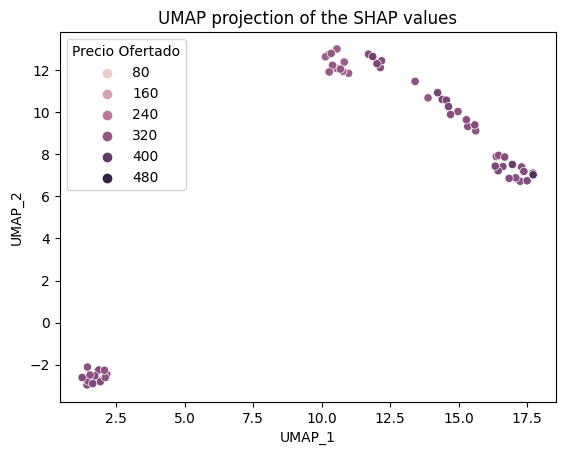

In [310]:
# Ahora usa Seaborn para visualizar
sns.scatterplot(data=embedding_df, x='UMAP_1', y='UMAP_2',hue=dataset.iloc[X_F64.index]['Precio Ofertado'])
plt.title('UMAP projection of the SHAP values')
plt.show()

Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.


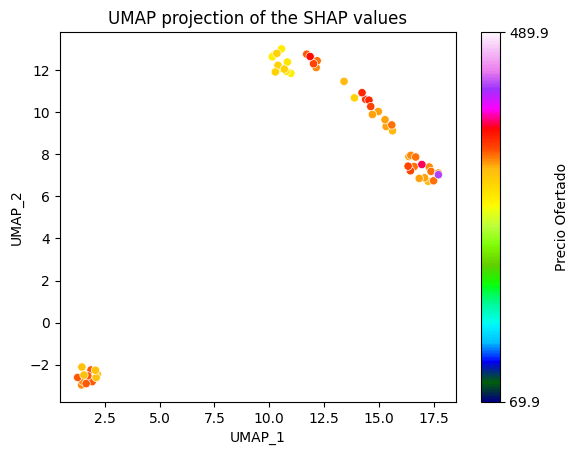

In [321]:
import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que embedding_df es tu DataFrame que tiene las columnas 'UMAP_1', 'UMAP_2'
# y que dataset.iloc[X_F64.index]['Precio Ofertado'] contiene los valores reales de precios ofertados

# Create a scatter plot with a continuous color scale and defined limits
scatterplot = sns.scatterplot(
    data=embedding_df,
    x='UMAP_1',
    y='UMAP_2',
    hue=dataset.iloc[X_F64.index]['Precio Ofertado'],
    palette='gist_ncar',
    legend=False  # Optionally hide the original legend if it's not needed
)

# Add title
plt.title('UMAP projection of the SHAP values')

# Manually add the colorbar
norm = plt.Normalize(vmin=vmin, vmax=vmax)
sm = plt.cm.ScalarMappable(cmap="gist_ncar", norm=norm)
sm.set_array([])

# Create colorbar with correct label
colorbar = plt.colorbar(sm)
colorbar.set_label('Precio Ofertado')

# Set the colorbar ticks and labels
colorbar.set_ticks([vmin, vmax])
colorbar.set_ticklabels([vmin, vmax])

# Show the plot
plt.show()